In [1]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  drive_path = '/content/drive/My\ Drive/'
except ImportError:
  drive_path = '.'

In [2]:
from glob import glob
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [3]:
dataset_name = 'cse-cic-ids2018'
dataset_file = f'{dataset_name}.zip'
dataset_path = Path(drive_path, f'datasets/registry.opendata.aws/{dataset_name}')
!pwd
print(dataset_path)

/home/ec2-user/SageMaker
datasets/registry.opendata.aws/cse-cic-ids2018


Download the https://www.unb.ca/cic/datasets/ids-2018.html dataset from s3 https://registry.opendata.aws/cse-cic-ids2018/

In [4]:
!aws s3 sync --no-sign-request --region eu-central-1 \
     "s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/" \
     $dataset_path

In [5]:
!cd $dataset_path && zip $dataset_file *.csv

updating: Friday-02-03-2018_TrafficForML_CICFlowMeter.csv (deflated 76%)
updating: Friday-16-02-2018_TrafficForML_CICFlowMeter.csv (deflated 79%)
updating: Friday-23-02-2018_TrafficForML_CICFlowMeter.csv (deflated 74%)
updating: Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv (deflated 75%)
updating: Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv (deflated 75%)
updating: Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv (deflated 73%)
updating: Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv (deflated 74%)
updating: Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv (deflated 78%)
updating: Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv (deflated 83%)
updating: Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv (deflated 74%)


Create local directory to store the dataset files.

In [6]:
! if ! test -r $dataset_name; then mkdir $dataset_name && cp $dataset_path/$dataset_file $dataset_name; fi

In [7]:
!ls -al $dataset_name

total 1632744
drwxrwxr-x 2 ec2-user ec2-user       4096 Jan  3 18:56 .
drwxr-xr-x 9 ec2-user ec2-user       4096 Jan  3 18:56 ..
-rw-rw-r-- 1 ec2-user ec2-user 1671921438 Jan  3 18:56 cse-cic-ids2018.zip


In [8]:
! if test -r $dataset_name/$dataset_file; then cd $dataset_name && unzip $dataset_file && rm -f $dataset_file; fi

Archive:  cse-cic-ids2018.zip
  inflating: Friday-02-03-2018_TrafficForML_CICFlowMeter.csv  
  inflating: Friday-16-02-2018_TrafficForML_CICFlowMeter.csv  
  inflating: Friday-23-02-2018_TrafficForML_CICFlowMeter.csv  
  inflating: Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv  
  inflating: Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv  
  inflating: Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv  
  inflating: Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv  
  inflating: Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv  
  inflating: Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv  
  inflating: Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv  


In [9]:
!ls -al $dataset_name

total 6725288
drwxrwxr-x 2 ec2-user ec2-user       4096 Jan  3 18:56 .
drwxr-xr-x 9 ec2-user ec2-user       4096 Jan  3 18:56 ..
-rw-rw-r-- 1 ec2-user ec2-user  352368373 Oct 11  2018 Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r-- 1 ec2-user ec2-user  333723605 Oct 11  2018 Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r-- 1 ec2-user ec2-user  382840456 Oct 11  2018 Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r-- 1 ec2-user ec2-user 4054925350 Oct 11  2018 Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r-- 1 ec2-user ec2-user  107842858 Oct 11  2018 Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r-- 1 ec2-user ec2-user  375945899 Oct 11  2018 Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r-- 1 ec2-user ec2-user  382636202 Oct 11  2018 Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r-- 1 ec2-user ec2-user  358223333 Oct 11  2018 Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r-- 1 ec2-user ec2-user  3288

In [10]:
!ls -alh $dataset_name

total 6.5G
drwxrwxr-x 2 ec2-user ec2-user 4.0K Jan  3 18:56 .
drwxr-xr-x 9 ec2-user ec2-user 4.0K Jan  3 18:56 ..
-rw-rw-r-- 1 ec2-user ec2-user 337M Oct 11  2018 Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r-- 1 ec2-user ec2-user 319M Oct 11  2018 Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r-- 1 ec2-user ec2-user 366M Oct 11  2018 Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r-- 1 ec2-user ec2-user 3.8G Oct 11  2018 Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r-- 1 ec2-user ec2-user 103M Oct 11  2018 Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r-- 1 ec2-user ec2-user 359M Oct 11  2018 Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r-- 1 ec2-user ec2-user 365M Oct 11  2018 Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r-- 1 ec2-user ec2-user 342M Oct 11  2018 Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r-- 1 ec2-user ec2-user 314M Oct 11  2018 Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv

In [11]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
devtmpfs         16G   76K   16G   1% /dev
tmpfs            16G     0   16G   0% /dev/shm
/dev/nvme0n1p1   94G   76G   19G  81% /
/dev/nvme1n1     20G   15G  4.2G  78% /home/ec2-user/SageMaker


Perform cleaning and feature selection separately for every data file

In [12]:
from nd00333.dataset.clean import clean

In [13]:
import importlib

In [14]:
importlib.reload(clean)

<module 'nd00333.dataset.clean.clean' from '/home/ec2-user/SageMaker/nd00333/dataset/clean/clean.py'>

Summarize one of the smaller data sets.

The following observations can be made:

1. 'Flow Byts/s' and 'Flow Pkts/s' columns contain non-numeric values
2. 'Init Fwd Win Byts' and 'Init Bwd Win Byts' contain a negative number '-1'
3. 'Flow IAT Min' amd 'Fwd IAT Min' contain large absolute negative values

The rows with those values in the respective columns will be removed (1. and 2., note that 2. results in a significant decrease in the number of non-Benign flows for a couple of data sets, e.g. for 'DoS attacks-Hulk', 'DDOS attack-HOIC', 'DDOS attack-LOIC-UDP') or replaced (3.) in the the `get_clean_df` function.

DataFrame before cleaning


,0,1,2,3,4
Dst Port,443,49684,443,443,443
Protocol,6,6,6,6,6
Timestamp,02/03/2018 08:47:38,02/03/2018 08:47:38,02/03/2018 08:47:40,02/03/2018 08:47:40,02/03/2018 08:47:41
Flow Duration,141385,281,279824,132,274016
Tot Fwd Pkts,9,2,11,2,9
Tot Bwd Pkts,7,1,15,0,13
TotLen Fwd Pkts,553,38,1086,0,1285
TotLen Bwd Pkts,3773,0,10527,0,6141
Fwd Pkt Len Max,202,38,385,0,517
Fwd Pkt Len Min,0,0,0,0,0


,count,mean,std,min,25%,50%,75%,max
Dst Port,1048575.0,8.423429e+03,1.516176e+04,0.000000,80.000000,3389.000000,8.080000e+03,6.553400e+04
Protocol,1048575.0,8.049848e+00,4.432629e+00,0.000000,6.000000,6.000000,6.000000e+00,1.700000e+01
Flow Duration,1048575.0,1.151421e+07,3.012113e+07,0.000000,516.000000,11242.000000,2.210150e+06,1.200000e+08
Tot Fwd Pkts,1048575.0,5.887282e+00,8.903317e+01,1.000000,2.000000,3.000000,7.000000e+00,4.315900e+04
Tot Bwd Pkts,1048575.0,6.983180e+00,2.129580e+02,0.000000,0.000000,1.000000,5.000000e+00,6.924100e+04
TotLen Fwd Pkts,1048575.0,3.920838e+02,2.159779e+03,0.000000,0.000000,63.000000,3.650000e+02,1.100627e+06
TotLen Bwd Pkts,1048575.0,5.271275e+03,3.088768e+05,0.000000,0.000000,129.000000,5.820000e+02,1.010000e+08
Fwd Pkt Len Max,1048575.0,2.104312e+02,2.669497e+02,0.000000,0.000000,46.000000,3.260000e+02,1.711000e+03
Fwd Pkt Len Min,1048575.0,8.249200e+00,2.094972e+01,0.000000,0.000000,0.000000,0.000000e+00,1.460000e+03
Fwd Pkt Len Mean,1048575.0,5.461640e+01,5.762840e+01,0.000000,0.000000,40.000000,1.086667e+02,1.460000e+03


DataFrame after feature removal, conversion to np.nan and replacing with negative values with 0


,0,1,2,3,4
Flow Duration,141385,281,279824,132,274016
Tot Fwd Pkts,9,2,11,2,9
Tot Bwd Pkts,7,1,15,0,13
TotLen Fwd Pkts,553,38,1086,0,1285
TotLen Bwd Pkts,3773,0,10527,0,6141
Fwd Pkt Len Max,202,38,385,0,517
Fwd Pkt Len Min,0,0,0,0,0
Fwd Pkt Len Mean,61.4444,19,98.7273,0,142.778
Fwd Pkt Len Std,87.5344,26.8701,129.392,0,183.888
Bwd Pkt Len Max,1460,0,1460,0,1460


,count,mean,std,min,25%,50%,75%,max
Flow Duration,1048575.0,1.151421e+07,3.012113e+07,0.000000,516.000000,11242.000000,2.210150e+06,1.200000e+08
Tot Fwd Pkts,1048575.0,5.887282e+00,8.903317e+01,1.000000,2.000000,3.000000,7.000000e+00,4.315900e+04
Tot Bwd Pkts,1048575.0,6.983180e+00,2.129580e+02,0.000000,0.000000,1.000000,5.000000e+00,6.924100e+04
TotLen Fwd Pkts,1048575.0,3.920838e+02,2.159779e+03,0.000000,0.000000,63.000000,3.650000e+02,1.100627e+06
TotLen Bwd Pkts,1048575.0,5.271275e+03,3.088768e+05,0.000000,0.000000,129.000000,5.820000e+02,1.010000e+08
Fwd Pkt Len Max,1048575.0,2.104312e+02,2.669497e+02,0.000000,0.000000,46.000000,3.260000e+02,1.711000e+03
Fwd Pkt Len Min,1048575.0,8.249200e+00,2.094972e+01,0.000000,0.000000,0.000000,0.000000e+00,1.460000e+03
Fwd Pkt Len Mean,1048575.0,5.461640e+01,5.762840e+01,0.000000,0.000000,40.000000,1.086667e+02,1.460000e+03
Fwd Pkt Len Std,1048575.0,7.796052e+01,9.693329e+01,0.000000,0.000000,0.000000,1.882162e+02,1.032376e+03
Bwd Pkt Len Max,1048575.0,3.471215e+02,5.037283e+02,0.000000,0.000000,112.000000,4.880000e+02,1.460000e+03


Converting column ACK Flag Cnt to_numeric
Converting column Active Max to_numeric
Converting column Active Mean to_numeric
Converting column Active Min to_numeric
Converting column Active Std to_numeric
Converting column Bwd Blk Rate Avg to_numeric
Converting column Bwd Byts/b Avg to_numeric
Converting column Bwd Header Len to_numeric
Converting column Bwd IAT Max to_numeric
Converting column Bwd IAT Mean to_numeric
Converting column Bwd IAT Min to_numeric
Converting column Bwd IAT Std to_numeric
Converting column Bwd IAT Tot to_numeric
Converting column Bwd PSH Flags to_numeric
Converting column Bwd Pkt Len Max to_numeric
Converting column Bwd Pkt Len Mean to_numeric
Converting column Bwd Pkt Len Min to_numeric
Converting column Bwd Pkt Len Std to_numeric
Converting column Bwd Pkts/b Avg to_numeric
Converting column Bwd Pkts/s to_numeric
Converting column Bwd Seg Size Avg to_numeric
Converting column Bwd URG Flags to_numeric
Converting column CWE Flag Count to_numeric
Converting colum

,0,1,2,3,4
Flow Duration,141385,281,279824,132,274016
Tot Fwd Pkts,9,2,11,2,9
Tot Bwd Pkts,7,1,15,0,13
TotLen Fwd Pkts,553,38,1086,0,1285
TotLen Bwd Pkts,3773,0,10527,0,6141
Fwd Pkt Len Max,202,38,385,0,517
Fwd Pkt Len Min,0,0,0,0,0
Fwd Pkt Len Mean,61.4444,19,98.7273,0,142.778
Fwd Pkt Len Std,87.5344,26.8701,129.392,0,183.888
Bwd Pkt Len Max,1460,0,1460,0,1460


,count,mean,std,min,25%,50%,75%,max
Flow Duration,1048575.0,1.151421e+07,3.012113e+07,0.000000,516.000000,11242.000000,2.210150e+06,1.200000e+08
Tot Fwd Pkts,1048575.0,5.887282e+00,8.903317e+01,1.000000,2.000000,3.000000,7.000000e+00,4.315900e+04
Tot Bwd Pkts,1048575.0,6.983180e+00,2.129580e+02,0.000000,0.000000,1.000000,5.000000e+00,6.924100e+04
TotLen Fwd Pkts,1048575.0,3.920838e+02,2.159779e+03,0.000000,0.000000,63.000000,3.650000e+02,1.100627e+06
TotLen Bwd Pkts,1048575.0,5.271275e+03,3.088768e+05,0.000000,0.000000,129.000000,5.820000e+02,1.010000e+08
Fwd Pkt Len Max,1048575.0,2.104312e+02,2.669497e+02,0.000000,0.000000,46.000000,3.260000e+02,1.711000e+03
Fwd Pkt Len Min,1048575.0,8.249200e+00,2.094972e+01,0.000000,0.000000,0.000000,0.000000e+00,1.460000e+03
Fwd Pkt Len Mean,1048575.0,5.461640e+01,5.762840e+01,0.000000,0.000000,40.000000,1.086667e+02,1.460000e+03
Fwd Pkt Len Std,1048575.0,7.796052e+01,9.693329e+01,0.000000,0.000000,0.000000,1.882162e+02,1.032376e+03
Bwd Pkt Len Max,1048575.0,3.471215e+02,5.037283e+02,0.000000,0.000000,112.000000,4.880000e+02,1.460000e+03


DataFrame missing values before their removal


,count,mean,std,min,25%,50%,75%,max
Flow Duration,514380.0,1.007919e+07,2.758430e+07,0.000000,400.000000,572.000000,22995.000000,1.199999e+08
Tot Fwd Pkts,514380.0,2.185746e+00,1.827559e+01,1.000000,1.000000,2.000000,2.000000,9.263000e+03
Tot Bwd Pkts,514380.0,6.505580e-01,3.102864e+01,0.000000,0.000000,0.000000,1.000000,1.669300e+04
TotLen Fwd Pkts,514380.0,3.204083e+01,8.130256e+02,0.000000,0.000000,0.000000,42.000000,1.578280e+05
TotLen Bwd Pkts,514380.0,2.055135e+02,3.618733e+04,0.000000,0.000000,0.000000,82.000000,1.990000e+07
Fwd Pkt Len Max,514380.0,1.889680e+01,2.955519e+01,0.000000,0.000000,0.000000,38.000000,1.460000e+03
Fwd Pkt Len Min,514380.0,1.652724e+01,2.495619e+01,0.000000,0.000000,0.000000,36.000000,1.232000e+03
Fwd Pkt Len Mean,514380.0,1.761791e+01,2.521308e+01,0.000000,0.000000,0.000000,37.000000,1.232000e+03
Fwd Pkt Len Std,514380.0,1.221525e+00,8.009432e+00,0.000000,0.000000,0.000000,0.000000,7.501328e+02
Bwd Pkt Len Max,514380.0,4.003063e+01,6.336373e+01,0.000000,0.000000,0.000000,72.000000,1.232000e+03


DataFrame before missing values removal, shape (1048575, 77)


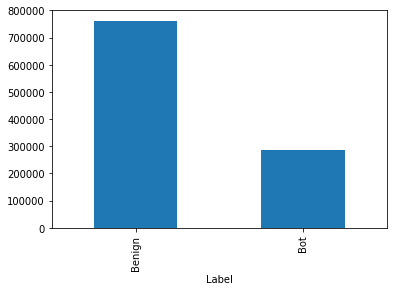

,Label,count
0,Benign,762384
1,Bot,286191


0    0.727067
1    0.272933
dtype: float64

DataFrame only missing values, shape (514380, 77)


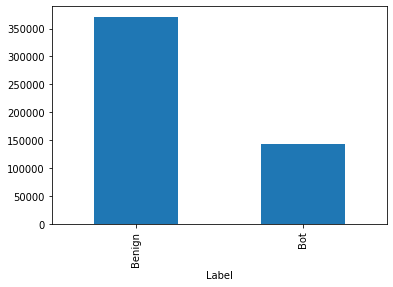

,Label,count
0,Benign,371203
1,Bot,143177


0    0.721651
1    0.278349
dtype: float64

Converting column ACK Flag Cnt round(0).astype(int)
Converting column Active Max round(0).astype(int)
Converting column Active Mean round(0).astype(int)
Converting column Active Min round(0).astype(int)
Converting column Active Std round(0).astype(int)
Converting column Bwd Blk Rate Avg round(0).astype(int)
Converting column Bwd Byts/b Avg round(0).astype(int)
Converting column Bwd Header Len round(0).astype(int)
Converting column Bwd IAT Max round(0).astype(int)
Converting column Bwd IAT Mean round(0).astype(int)
Converting column Bwd IAT Min round(0).astype(int)
Converting column Bwd IAT Std round(0).astype(int)
Converting column Bwd IAT Tot round(0).astype(int)
Converting column Bwd PSH Flags round(0).astype(int)
Converting column Bwd Pkt Len Max round(0).astype(int)
Converting column Bwd Pkt Len Mean round(0).astype(int)
Converting column Bwd Pkt Len Min round(0).astype(int)
Converting column Bwd Pkt Len Std round(0).astype(int)
Converting column Bwd Pkts/b Avg round(0).astype(int)

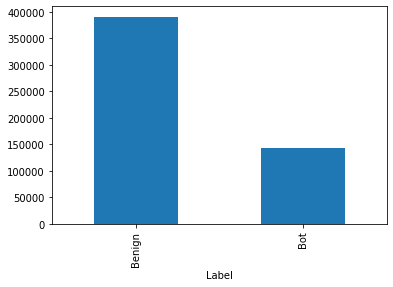

,Label,count
0,Benign,390961
1,Bot,143014


0    0.732171
1    0.267829
dtype: float64

DataFrame after missing values removal, shape (533975, 77)


,0,1,2,4,6
Flow Duration,141385,281,279824,274016,5964033
Tot Fwd Pkts,9,2,11,9,3
Tot Bwd Pkts,7,1,15,13,1
TotLen Fwd Pkts,553,38,1086,1285,0
TotLen Bwd Pkts,3773,0,10527,6141,0
Fwd Pkt Len Max,202,38,385,517,0
Fwd Pkt Len Min,0,0,0,0,0
Fwd Pkt Len Mean,61,19,99,143,0
Fwd Pkt Len Std,88,27,129,184,0
Bwd Pkt Len Max,1460,0,1460,1460,0


,count,mean,std,min,25%,50%,75%,max
Flow Duration,533975.0,1.290131e+07,3.232201e+07,1.0,10910.0,1271166.0,3959368.0,119999997.0
Tot Fwd Pkts,533975.0,9.454999e+00,1.233634e+02,1.0,3.0,6.0,9.0,43159.0
Tot Bwd Pkts,533975.0,1.308587e+01,2.967379e+02,1.0,4.0,5.0,7.0,69241.0
TotLen Fwd Pkts,533975.0,7.390618e+02,2.877147e+03,0.0,326.0,364.0,1144.0,1100627.0
TotLen Bwd Pkts,533975.0,1.015331e+04,4.313215e+05,0.0,129.0,488.0,1581.0,101000000.0
Fwd Pkt Len Max,533975.0,3.950094e+02,2.639620e+02,0.0,161.0,326.0,661.0,1711.0
Fwd Pkt Len Min,533975.0,2.641903e-01,1.148109e+01,0.0,0.0,0.0,0.0,1460.0
Fwd Pkt Len Mean,533975.0,9.037567e+01,5.766305e+01,0.0,52.0,109.0,120.0,1460.0
Fwd Pkt Len Std,533975.0,1.518660e+02,8.513680e+01,0.0,83.0,188.0,210.0,1032.0
Bwd Pkt Len Max,533975.0,6.430848e+02,5.620702e+02,0.0,112.0,460.0,1173.0,1460.0


targets {'Benign': 0, 'Bot': 1}
Initial DataFrame target
Final DataFrame target
Initial X_train.shape, X_test.shape (186891, 76), (80097, 76)
quasi_constant_feat ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Pkt Len Min', 'CWE Flag Count', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']
After quasi_constant_feat removal X_train.shape, X_test.shape (186891, 65), (80097, 65)
0
10
20
30
40
50
60
duplicated_feat ['Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'SYN Flag Cnt', 'ECE Flag Cnt']
After duplicated_feat removal X_train.shape, X_test.shape (186891, 58), (80097, 58)
Test performance metrics=0.999953
Test performance clasification report
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     58793
           1     1.0000    0.9999    1.0000     21304

    accuracy                         1.0000     80097
   macro 

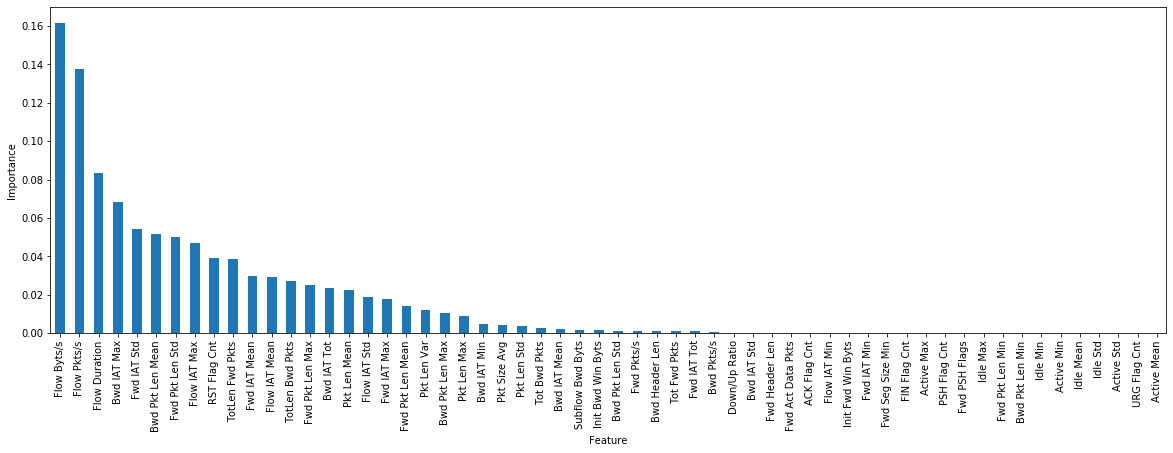

features importance list ['Flow Byts/s', 'Flow Pkts/s', 'Flow Duration', 'Bwd IAT Max', 'Fwd IAT Std', 'Bwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Flow IAT Max', 'RST Flag Cnt', 'TotLen Fwd Pkts', 'Fwd IAT Mean', 'Flow IAT Mean', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Bwd IAT Tot', 'Pkt Len Mean', 'Flow IAT Std', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Pkt Len Var', 'Bwd Pkt Len Max', 'Pkt Len Max', 'Bwd IAT Min', 'Pkt Size Avg', 'Pkt Len Std', 'Tot Bwd Pkts', 'Bwd IAT Mean', 'Subflow Bwd Byts', 'Init Bwd Win Byts', 'Bwd Pkt Len Std', 'Fwd Pkts/s', 'Bwd Header Len', 'Tot Fwd Pkts', 'Fwd IAT Tot', 'Bwd Pkts/s', 'Down/Up Ratio', 'Bwd IAT Std', 'Fwd Header Len', 'Fwd Act Data Pkts', 'ACK Flag Cnt', 'Flow IAT Min', 'Init Fwd Win Byts', 'Fwd IAT Min', 'Fwd Seg Size Min', 'FIN Flag Cnt', 'Active Max', 'PSH Flag Cnt', 'Fwd PSH Flags', 'Idle Max', 'Fwd Pkt Len Min', 'Bwd Pkt Len Min', 'Idle Min', 'Active Min', 'Idle Mean', 'Idle Std', 'Active Std', 'URG Flag Cnt', 'Active Mean']
Test one feature perfo

In [15]:
df = pd.read_csv(f'{dataset_name}/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv')
df = clean.get_clean_df(df, verbose=2)
df['target'] = df.pop('Label')
feature_list = clean.get_feature_list(df, tolerance=0.0001, sample_fraction=0.5)
print(feature_list)
del df

A 16 GB machine is unable to keep copies of the largest dataset `Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv` in memory. Therefore some of the low variance and duplicate features found in smaller datasets are removed upfront from the lagest dataset to reduce its size. Moreover the lagest data file contains `extra_features` not present in other data files, and they are therefore removed. Additionally, due to a large number (almost 8 millions) samples if the largest data set a sample of 5% (instead of 50% as in all other data files) is used in the process of feature selection.

Many people (e.g. Frank Harrell https://twitter.com/f2harrell/status/1137012097391312897?lang=en `Feature selection doesn't work in general because it can't find the right variables and distorts statistical properties.  One summary of the evils of stepwise`) claim that no feature selection should be performed. In this case reducing the number of features is necessary due to limited computing resources.

In principle a feature selection should happen on an isolated subset of the data, in order to not involve the test data in any model choices. This approach is not followed strictly here, as the feature selection is performed based on the full dataset, but this is acceptable, since another separate test set https://www.unb.ca/cic/datasets/ids-2017.html is used for the final estimation of the model performance.

The features are selected in `get_feature_list` using an addition process, where features are added on-by-one in the order of importance, only if by adding a feature the performance metrics (the macro average of recall across all target classes) increases by a threshold.

In [16]:
columns = []
for dataset_file in sorted(glob(f'{dataset_name}/*.csv')):
  columns_dataset_file = pd.read_csv(f'{dataset_file}', index_col=0, nrows=0).columns.tolist()
  columns_new = set(columns_dataset_file) - set(columns)
  if len(columns_new):
    print(f'New columns in {dataset_file}', columns_new)
    columns.extend(columns_new)

New columns in cse-cic-ids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv {'Fwd URG Flags', 'SYN Flag Cnt', 'Subflow Bwd Byts', 'FIN Flag Cnt', 'Init Bwd Win Byts', 'RST Flag Cnt', 'Fwd PSH Flags', 'Fwd Pkt Len Max', 'Fwd IAT Mean', 'Pkt Size Avg', 'Bwd Seg Size Avg', 'TotLen Bwd Pkts', 'URG Flag Cnt', 'ACK Flag Cnt', 'Subflow Bwd Pkts', 'Flow Duration', 'Fwd Pkt Len Mean', 'Fwd Header Len', 'Bwd PSH Flags', 'ECE Flag Cnt', 'Fwd Pkt Len Std', 'Flow IAT Max', 'Active Min', 'Fwd Pkts/s', 'Flow Pkts/s', 'Bwd Header Len', 'Bwd IAT Min', 'Active Mean', 'Idle Max', 'Idle Min', 'Pkt Len Max', 'PSH Flag Cnt', 'Bwd IAT Std', 'Active Max', 'Tot Fwd Pkts', 'Bwd IAT Tot', 'Fwd IAT Std', 'Bwd Byts/b Avg', 'Pkt Len Var', 'Fwd IAT Tot', 'Down/Up Ratio', 'Subflow Fwd Byts', 'Idle Std', 'Fwd Pkt Len Min', 'Active Std', 'Bwd Pkt Len Min', 'Flow Byts/s', 'Bwd Blk Rate Avg', 'Fwd Blk Rate Avg', 'TotLen Fwd Pkts', 'Bwd IAT Max', 'Fwd Byts/b Avg', 'Flow IAT Min', 'Bwd Pkt Len Std', 'Idle Mean', 'Pkt Le

In [17]:
quasi_constant_features = ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Byts/b Avg',
                           'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']
duplicated_features = ['Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Byts', 'Fwd Seg Size Avg',
                       'Bwd Seg Size Avg', 'SYN Flag Cnt', 'ECE Flag Cnt']
extra_features = ['Src IP', 'Src Port', 'Dst Port', 'Dst IP']

################################################################################
New datafile: cse-cic-ids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
################################################################################
DataFrame before cleaning


,count,mean,std,min,25%,50%,75%,max
Protocol,1048575.0,8.049848e+00,4.432629e+00,0.000000,6.000000,6.000000,6.000000e+00,1.700000e+01
Flow Duration,1048575.0,1.151421e+07,3.012113e+07,0.000000,516.000000,11242.000000,2.210150e+06,1.200000e+08
Tot Fwd Pkts,1048575.0,5.887282e+00,8.903317e+01,1.000000,2.000000,3.000000,7.000000e+00,4.315900e+04
Tot Bwd Pkts,1048575.0,6.983180e+00,2.129580e+02,0.000000,0.000000,1.000000,5.000000e+00,6.924100e+04
TotLen Fwd Pkts,1048575.0,3.920838e+02,2.159779e+03,0.000000,0.000000,63.000000,3.650000e+02,1.100627e+06
TotLen Bwd Pkts,1048575.0,5.271275e+03,3.088768e+05,0.000000,0.000000,129.000000,5.820000e+02,1.010000e+08
Fwd Pkt Len Max,1048575.0,2.104312e+02,2.669497e+02,0.000000,0.000000,46.000000,3.260000e+02,1.711000e+03
Fwd Pkt Len Min,1048575.0,8.249200e+00,2.094972e+01,0.000000,0.000000,0.000000,0.000000e+00,1.460000e+03
Fwd Pkt Len Mean,1048575.0,5.461640e+01,5.762840e+01,0.000000,0.000000,40.000000,1.086667e+02,1.460000e+03
Fwd Pkt Len Std,1048575.0,7.796052e+01,9.693329e+01,0.000000,0.000000,0.000000,1.882162e+02,1.032376e+03


DataFrame before missing values removal, shape (1048575, 77)


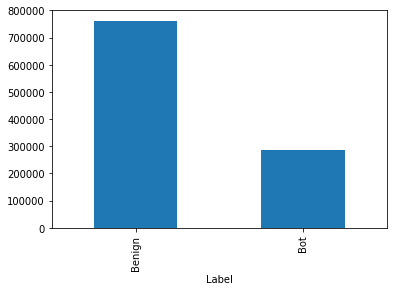

,Label,count
0,Benign,762384
1,Bot,286191


0    0.727067
1    0.272933
dtype: float64

DataFrame only missing values, shape (514380, 77)


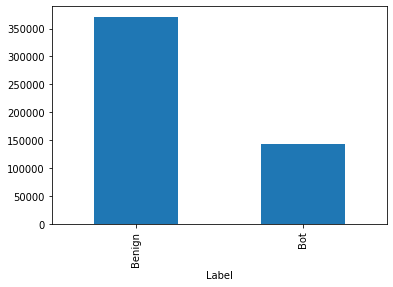

,Label,count
0,Benign,371203
1,Bot,143177


0    0.721651
1    0.278349
dtype: float64

DataFrame only missing values, shape (514380, 77)


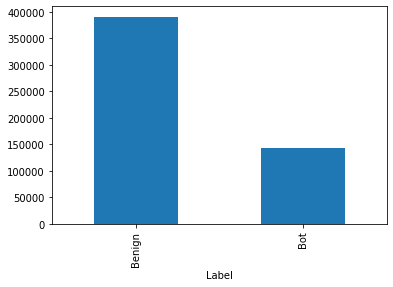

,Label,count
0,Benign,390961
1,Bot,143014


0    0.732171
1    0.267829
dtype: float64

DataFrame after missing values removal, shape (533975, 77)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,533975.0,1.290131e+07,3.232201e+07,1.0,10910.0,1271166.0,3959368.0,119999997.0
Tot Fwd Pkts,533975.0,9.454999e+00,1.233634e+02,1.0,3.0,6.0,9.0,43159.0
Tot Bwd Pkts,533975.0,1.308587e+01,2.967379e+02,1.0,4.0,5.0,7.0,69241.0
TotLen Fwd Pkts,533975.0,7.390618e+02,2.877147e+03,0.0,326.0,364.0,1144.0,1100627.0
TotLen Bwd Pkts,533975.0,1.015331e+04,4.313215e+05,0.0,129.0,488.0,1581.0,101000000.0
Fwd Pkt Len Max,533975.0,3.950094e+02,2.639620e+02,0.0,161.0,326.0,661.0,1711.0
Fwd Pkt Len Min,533975.0,2.641903e-01,1.148109e+01,0.0,0.0,0.0,0.0,1460.0
Fwd Pkt Len Mean,533975.0,9.037567e+01,5.766305e+01,0.0,52.0,109.0,120.0,1460.0
Fwd Pkt Len Std,533975.0,1.518660e+02,8.513680e+01,0.0,83.0,188.0,210.0,1032.0
Bwd Pkt Len Max,533975.0,6.430848e+02,5.620702e+02,0.0,112.0,460.0,1173.0,1460.0


targets {'Benign': 0, 'Bot': 1}
Initial DataFrame target
Final DataFrame target
Initial X_train.shape, X_test.shape (186891, 76), (80097, 76)
quasi_constant_feat ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Pkt Len Min', 'CWE Flag Count', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']
After quasi_constant_feat removal X_train.shape, X_test.shape (186891, 65), (80097, 65)
0
10
20
30
40
50
60
duplicated_feat ['Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'SYN Flag Cnt', 'ECE Flag Cnt']
After duplicated_feat removal X_train.shape, X_test.shape (186891, 58), (80097, 58)
Test performance metrics=0.999953
Test performance clasification report
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     58793
           1     1.0000    0.9999    1.0000     21304

    accuracy                         1.0000     80097
   macro 

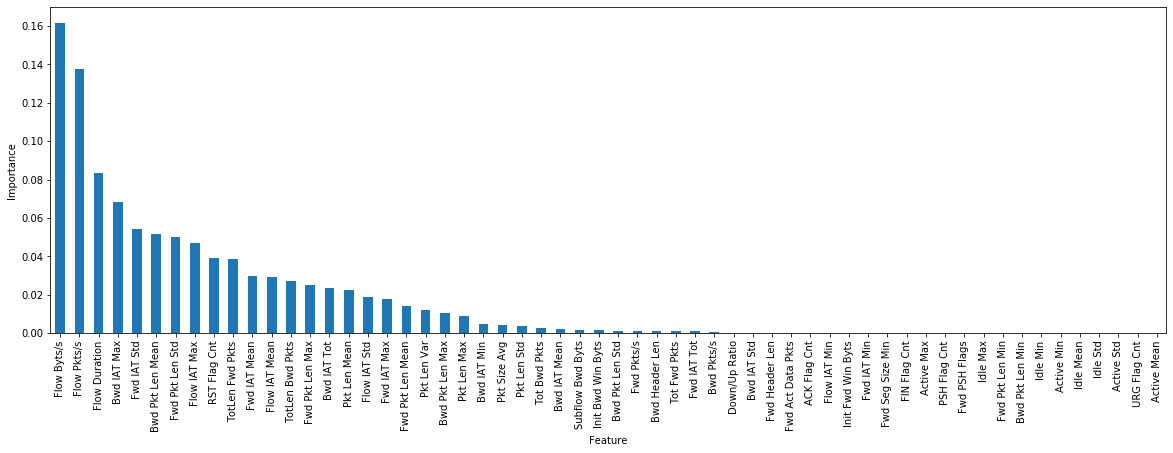

features importance list ['Flow Byts/s', 'Flow Pkts/s', 'Flow Duration', 'Bwd IAT Max', 'Fwd IAT Std', 'Bwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Flow IAT Max', 'RST Flag Cnt', 'TotLen Fwd Pkts', 'Fwd IAT Mean', 'Flow IAT Mean', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Bwd IAT Tot', 'Pkt Len Mean', 'Flow IAT Std', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Pkt Len Var', 'Bwd Pkt Len Max', 'Pkt Len Max', 'Bwd IAT Min', 'Pkt Size Avg', 'Pkt Len Std', 'Tot Bwd Pkts', 'Bwd IAT Mean', 'Subflow Bwd Byts', 'Init Bwd Win Byts', 'Bwd Pkt Len Std', 'Fwd Pkts/s', 'Bwd Header Len', 'Tot Fwd Pkts', 'Fwd IAT Tot', 'Bwd Pkts/s', 'Down/Up Ratio', 'Bwd IAT Std', 'Fwd Header Len', 'Fwd Act Data Pkts', 'ACK Flag Cnt', 'Flow IAT Min', 'Init Fwd Win Byts', 'Fwd IAT Min', 'Fwd Seg Size Min', 'FIN Flag Cnt', 'Active Max', 'PSH Flag Cnt', 'Fwd PSH Flags', 'Idle Max', 'Fwd Pkt Len Min', 'Bwd Pkt Len Min', 'Idle Min', 'Active Min', 'Idle Mean', 'Idle Std', 'Active Std', 'URG Flag Cnt', 'Active Mean']
Test one feature perfo

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DataFrame before cleaning


,count,unique,top,freq
Protocol,1048575,7,6,1040250
Timestamp,1048575,3178,16/02/2018 01:45:28,8403
Flow Duration,1048575,453876,2,58706
Tot Fwd Pkts,1048575,43,5,426407
Tot Bwd Pkts,1048575,37,0,438014
TotLen Fwd Pkts,1048575,481,0,572790
TotLen Bwd Pkts,1048575,862,0,572823
Fwd Pkt Len Max,1048575,182,0,572790
Fwd Pkt Len Min,1048575,7,0,1040366
Fwd Pkt Len Mean,1.04858e+06,936,0,572790


DataFrame before missing values removal, shape (1048575, 77)


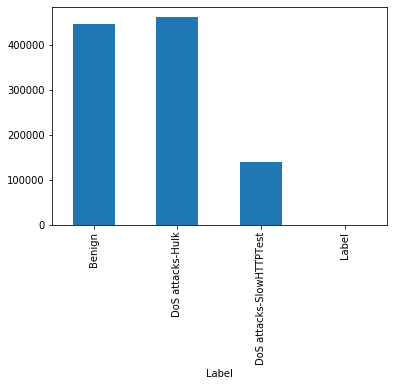

,Label,count
0,Benign,446772
1,DoS attacks-Hulk,461912
2,DoS attacks-SlowHTTPTest,139890
3,Label,1


0    4.260754e-01
1    4.405140e-01
2    1.334096e-01
3    9.536752e-07
dtype: float64

DataFrame only missing values, shape (438027, 77)


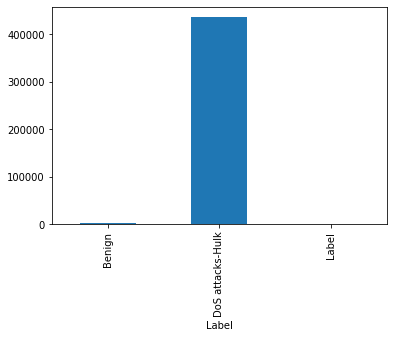

,Label,count
0,Benign,1926
1,DoS attacks-Hulk,436100
2,Label,1


0    0.004397
1    0.995601
2    0.000002
dtype: float64

DataFrame only missing values, shape (438027, 77)


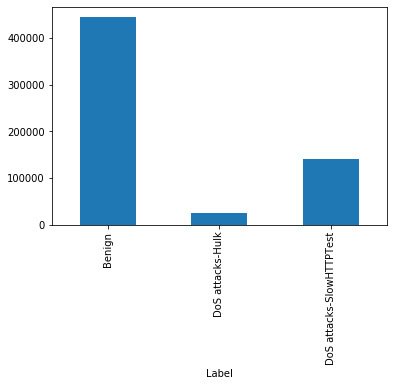

,Label,count
0,Benign,444846
1,DoS attacks-Hulk,25812
2,DoS attacks-SlowHTTPTest,139890


0    0.728601
1    0.042277
2    0.229122
dtype: float64

DataFrame after missing values removal, shape (610548, 77)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,610548.0,4.139883e+06,7.486029e+06,1.0,49528.75,4216831.5,4433755.75,112641773.0
Tot Fwd Pkts,610548.0,3.986452e+00,1.773694e+00,1.0,3.00,5.0,5.00,229.0
Tot Bwd Pkts,610548.0,2.843025e+00,2.048346e+00,0.0,3.00,3.0,3.00,889.0
TotLen Fwd Pkts,610548.0,6.930354e+02,4.008065e+02,0.0,341.00,935.0,935.00,16544.0
TotLen Bwd Pkts,610548.0,3.301963e+02,2.853256e+03,0.0,293.00,341.0,370.00,1566268.0
Fwd Pkt Len Max,610548.0,6.918430e+02,3.996512e+02,0.0,338.00,935.0,935.00,2912.0
Fwd Pkt Len Min,610548.0,2.207853e-03,6.994160e-01,0.0,0.00,0.0,0.00,300.0
Fwd Pkt Len Mean,610548.0,1.411048e+02,8.034594e+01,0.0,95.00,187.0,187.00,698.0
Fwd Pkt Len Std,610548.0,3.119801e+02,1.787660e+02,0.0,178.00,418.0,418.00,600.0
Bwd Pkt Len Max,610548.0,2.898699e+02,2.010773e+02,0.0,292.00,335.0,363.00,8688.0


targets {'Benign': 0, 'DoS attacks-SlowHTTPTest': 1, 'DoS attacks-Hulk': 2}
Initial DataFrame target
Final DataFrame target
Initial X_train.shape, X_test.shape (213691, 76), (91583, 76)
quasi_constant_feat ['Fwd Pkt Len Min', 'Bwd Pkt Len Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Pkt Len Min', 'SYN Flag Cnt', 'RST Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Active Std', 'Idle Std']
After quasi_constant_feat removal X_train.shape, X_test.shape (213691, 57), (91583, 57)
0
10
20
30
40
50
duplicated_feat ['Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Byts', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg']
After duplicated_feat removal X_train.shape, X_test.shape (213691, 51), (91583, 51)
Test performance metrics=0.999995
Test performance clasification report
               precision    recall  f1-score   support

           0  

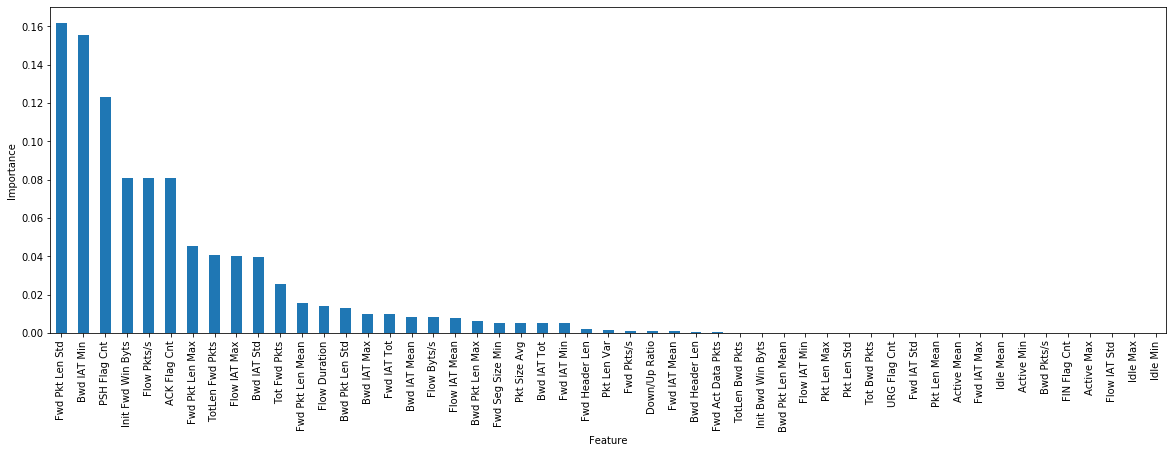

features importance list ['Fwd Pkt Len Std', 'Bwd IAT Min', 'PSH Flag Cnt', 'Init Fwd Win Byts', 'Flow Pkts/s', 'ACK Flag Cnt', 'Fwd Pkt Len Max', 'TotLen Fwd Pkts', 'Flow IAT Max', 'Bwd IAT Std', 'Tot Fwd Pkts', 'Fwd Pkt Len Mean', 'Flow Duration', 'Bwd Pkt Len Std', 'Bwd IAT Max', 'Fwd IAT Tot', 'Bwd IAT Mean', 'Flow Byts/s', 'Flow IAT Mean', 'Bwd Pkt Len Max', 'Fwd Seg Size Min', 'Pkt Size Avg', 'Bwd IAT Tot', 'Fwd IAT Min', 'Fwd Header Len', 'Pkt Len Var', 'Fwd Pkts/s', 'Down/Up Ratio', 'Fwd IAT Mean', 'Bwd Header Len', 'Fwd Act Data Pkts', 'TotLen Bwd Pkts', 'Init Bwd Win Byts', 'Bwd Pkt Len Mean', 'Flow IAT Min', 'Pkt Len Max', 'Pkt Len Std', 'Tot Bwd Pkts', 'URG Flag Cnt', 'Fwd IAT Std', 'Pkt Len Mean', 'Active Mean', 'Fwd IAT Max', 'Idle Mean', 'Active Min', 'Bwd Pkts/s', 'FIN Flag Cnt', 'Active Max', 'Flow IAT Std', 'Idle Max', 'Idle Min']
Test one feature performance metrics=0.993985
Test one feature performance clasification report
               precision    recall  f1-scor

,count,mean,std,min,25%,50%,75%,max
Protocol,1048575.0,8.975475e+00,5.043780e+00,0.000000,6.000000,6.000000,1.700000e+01,1.700000e+01
Flow Duration,1048575.0,1.872781e+07,3.633651e+07,0.000000,512.000000,95118.000000,5.284498e+06,1.200000e+08
Tot Fwd Pkts,1048575.0,6.973433e+00,1.208786e+02,1.000000,1.000000,2.000000,8.000000e+00,5.809100e+04
Tot Bwd Pkts,1048575.0,9.927304e+00,3.130818e+02,0.000000,0.000000,1.000000,7.000000e+00,1.231180e+05
TotLen Fwd Pkts,1048575.0,4.139611e+02,2.152351e+03,0.000000,0.000000,45.000000,4.550000e+02,1.582330e+06
TotLen Bwd Pkts,1048575.0,9.754156e+03,4.400548e+05,0.000000,0.000000,101.000000,6.995000e+02,1.563604e+08
Fwd Pkt Len Max,1048575.0,1.829207e+02,2.760979e+02,0.000000,0.000000,41.000000,1.960000e+02,6.592000e+03
Fwd Pkt Len Min,1048575.0,1.238202e+01,2.864373e+01,0.000000,0.000000,0.000000,3.100000e+01,1.449000e+03
Fwd Pkt Len Mean,1048575.0,4.556939e+01,5.596788e+01,0.000000,0.000000,36.000000,5.685197e+01,1.809552e+03
Fwd Pkt Len Std,1048575.0,5.634453e+01,8.955282e+01,0.000000,0.000000,0.000000,9.218699e+01,1.405737e+03


DataFrame before missing values removal, shape (1048575, 77)


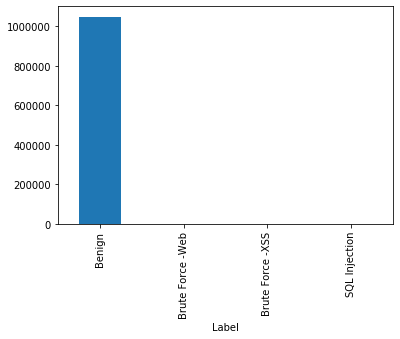

,Label,count
0,Benign,1048009
1,Brute Force -Web,362
2,Brute Force -XSS,151
3,SQL Injection,53


0    0.999460
1    0.000345
2    0.000144
3    0.000051
dtype: float64

DataFrame only missing values, shape (573167, 77)


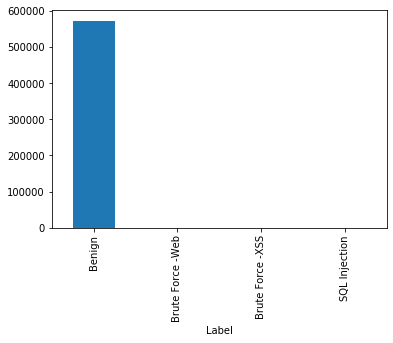

,Label,count
0,Benign,572834
1,Brute Force -Web,237
2,Brute Force -XSS,78
3,SQL Injection,18


0    0.999419
1    0.000413
2    0.000136
3    0.000031
dtype: float64

DataFrame only missing values, shape (573167, 77)


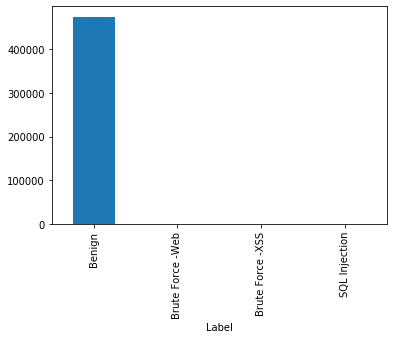

,Label,count
0,Benign,475016
1,Brute Force -Web,125
2,Brute Force -XSS,73
3,SQL Injection,35


0    0.999510
1    0.000263
2    0.000154
3    0.000074
dtype: float64

DataFrame after missing values removal, shape (475249, 77)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,475249.0,1.971589e+07,3.840013e+07,1.0,107036.0,2761539.0,5814053.0,119999967.0
Tot Fwd Pkts,475249.0,1.315628e+01,1.793176e+02,1.0,3.0,8.0,13.0,58091.0
Tot Bwd Pkts,475249.0,2.114559e+01,4.647974e+02,1.0,4.0,7.0,8.0,123118.0
TotLen Fwd Pkts,475249.0,8.666441e+02,3.133311e+03,0.0,97.0,597.0,1156.0,1582330.0
TotLen Bwd Pkts,475249.0,2.143635e+04,6.534603e+05,0.0,231.0,1581.0,1731.0,156360426.0
Fwd Pkt Len Max,475249.0,3.735375e+02,3.165473e+02,0.0,97.0,263.0,677.0,6592.0
Fwd Pkt Len Min,475249.0,2.840280e-01,1.135495e+01,0.0,0.0,0.0,0.0,1449.0
Fwd Pkt Len Mean,475249.0,7.202467e+01,6.508468e+01,0.0,24.0,60.0,104.0,1810.0
Fwd Pkt Len Std,475249.0,1.226308e+02,9.786797e+01,0.0,48.0,93.0,197.0,1406.0
Bwd Pkt Len Max,475249.0,7.518492e+02,5.695945e+02,0.0,156.0,1068.0,1179.0,4012.0


targets {'Benign': 0, 'Brute Force -Web': 1, 'Brute Force -XSS': 2, 'SQL Injection': 3}
Initial DataFrame target
Final DataFrame target
Initial X_train.shape, X_test.shape (166336, 76), (71288, 76)
quasi_constant_feat ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Pkt Len Min', 'CWE Flag Count', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']
After quasi_constant_feat removal X_train.shape, X_test.shape (166336, 65), (71288, 65)
0
10
20
30
40
50
60
duplicated_feat ['Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Byts', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'SYN Flag Cnt', 'ECE Flag Cnt']
After duplicated_feat removal X_train.shape, X_test.shape (166336, 57), (71288, 57)
Test performance metrics=0.937500
Test performance clasification report
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     71250
           1     1.0000    1.0000    1.000

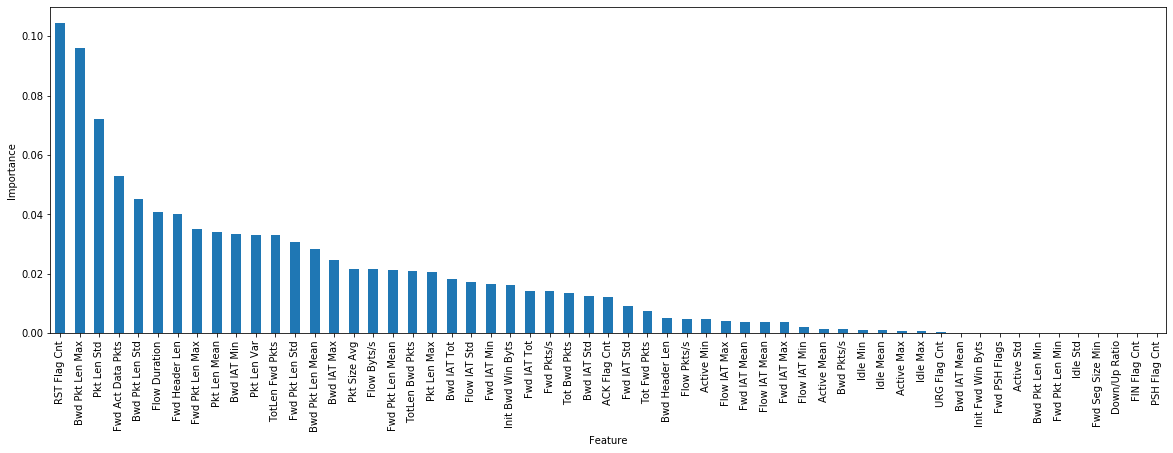

features importance list ['RST Flag Cnt', 'Bwd Pkt Len Max', 'Pkt Len Std', 'Fwd Act Data Pkts', 'Bwd Pkt Len Std', 'Flow Duration', 'Fwd Header Len', 'Fwd Pkt Len Max', 'Pkt Len Mean', 'Bwd IAT Min', 'Pkt Len Var', 'TotLen Fwd Pkts', 'Fwd Pkt Len Std', 'Bwd Pkt Len Mean', 'Bwd IAT Max', 'Pkt Size Avg', 'Flow Byts/s', 'Fwd Pkt Len Mean', 'TotLen Bwd Pkts', 'Pkt Len Max', 'Bwd IAT Tot', 'Flow IAT Std', 'Fwd IAT Min', 'Init Bwd Win Byts', 'Fwd IAT Tot', 'Fwd Pkts/s', 'Tot Bwd Pkts', 'Bwd IAT Std', 'ACK Flag Cnt', 'Fwd IAT Std', 'Tot Fwd Pkts', 'Bwd Header Len', 'Flow Pkts/s', 'Active Min', 'Flow IAT Max', 'Fwd IAT Mean', 'Flow IAT Mean', 'Fwd IAT Max', 'Flow IAT Min', 'Active Mean', 'Bwd Pkts/s', 'Idle Min', 'Idle Mean', 'Active Max', 'Idle Max', 'URG Flag Cnt', 'Bwd IAT Mean', 'Init Fwd Win Byts', 'Fwd PSH Flags', 'Active Std', 'Bwd Pkt Len Min', 'Fwd Pkt Len Min', 'Idle Std', 'Fwd Seg Size Min', 'Down/Up Ratio', 'FIN Flag Cnt', 'PSH Flag Cnt']
Test one feature performance metrics=0.250

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


New Test performance metrics=0.875
Previous round performance metrics=0.25
Increase in performance_metrics=0.625
keep:  Bwd Pkt Len Max

testing feature:  Pkt Len Std 2  out of  57
New Test performance metrics=0.9374964912280702
Previous round performance metrics=0.875
Increase in performance_metrics=0.06249649122807022
keep:  Pkt Len Std

testing feature:  Fwd Act Data Pkts 3  out of  57
New Test performance metrics=0.9375
Previous round performance metrics=0.9374964912280702
Increase in performance metrics=3.508771929783272e-06
skip:  Fwd Act Data Pkts

testing feature:  Bwd Pkt Len Std 4  out of  57
New Test performance metrics=0.9374964912280702
Previous round performance metrics=0.9374964912280702
Increase in performance metrics=0.0
skip:  Bwd Pkt Len Std

testing feature:  Flow Duration 5  out of  57
New Test performance metrics=0.9375
Previous round performance metrics=0.9374964912280702
Increase in performance metrics=3.508771929783272e-06
skip:  Flow Duration

testing feature:

,count,mean,std,min,25%,50%,75%,max
Protocol,7948748.0,9.363284e+00,5.247283e+00,0.000000,6.000000,6.000000,1.700000e+01,1.700000e+01
Flow Duration,7948748.0,1.353327e+07,3.243525e+07,0.000000,448.000000,52079.000000,3.170154e+06,1.200000e+08
Tot Fwd Pkts,7948748.0,1.698159e+01,1.244368e+03,1.000000,1.000000,2.000000,7.000000e+00,2.800430e+05
Tot Bwd Pkts,7948748.0,6.713097e+00,1.580529e+02,0.000000,1.000000,1.000000,5.000000e+00,2.580600e+04
TotLen Fwd Pkts,7948748.0,7.137929e+02,3.983634e+04,0.000000,11.000000,43.000000,3.910000e+02,8.961376e+06
TotLen Bwd Pkts,7948748.0,5.008268e+03,2.281501e+05,0.000000,0.000000,108.000000,9.640000e+02,3.758338e+07
Fwd Pkt Len Max,7948748.0,1.706698e+02,2.599629e+02,0.000000,1.000000,41.000000,1.940000e+02,5.647000e+03
Fwd Pkt Len Min,7948748.0,1.329747e+01,2.421130e+01,0.000000,0.000000,0.000000,3.400000e+01,1.460000e+03
Fwd Pkt Len Mean,7948748.0,4.565116e+01,5.039649e+01,0.000000,0.857143,37.000000,5.510000e+01,1.460000e+03
Fwd Pkt Len Std,7948748.0,5.404863e+01,8.736557e+01,0.000000,0.000000,0.000000,8.515101e+01,1.032376e+03


DataFrame before missing values removal, shape (7948748, 59)


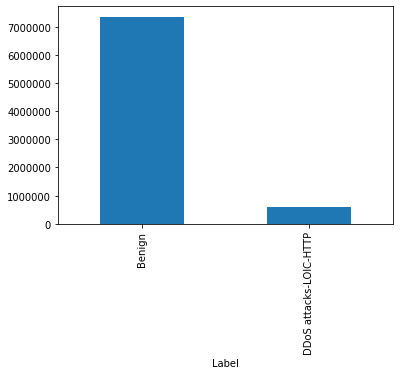

,Label,count
0,Benign,7372557
1,DDoS attacks-LOIC-HTTP,576191


0    0.927512
1    0.072488
dtype: float64

DataFrame only missing values, shape (4209795, 59)


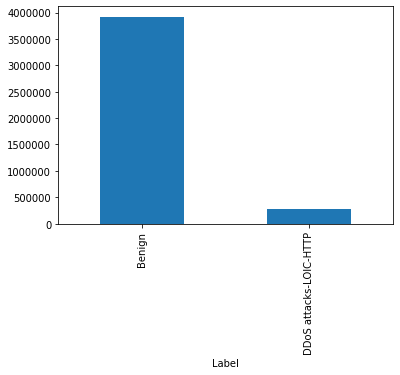

,Label,count
0,Benign,3922893
1,DDoS attacks-LOIC-HTTP,286902


0    0.931849
1    0.068151
dtype: float64

DataFrame only missing values, shape (4209795, 59)


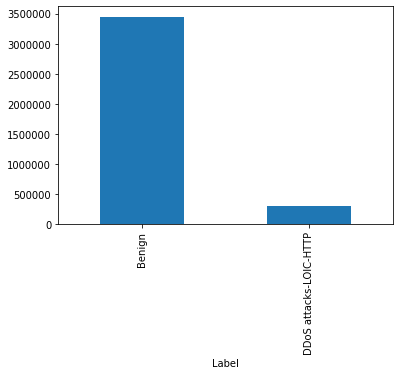

,Label,count
0,Benign,3448885
1,DDoS attacks-LOIC-HTTP,289289


0    0.922612
1    0.077388
dtype: float64

DataFrame after missing values removal, shape (3738174, 59)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,3738174.0,2.037625e+07,3.929724e+07,1.0,188677.25,1889399.0,6032630.25,120000000.0
Tot Fwd Pkts,3738174.0,9.724678e+00,8.469000e+01,1.0,3.00,8.0,10.00,12639.0
Tot Bwd Pkts,3738174.0,1.340868e+01,2.302592e+02,1.0,4.00,7.0,8.00,25806.0
TotLen Fwd Pkts,3738174.0,7.125010e+02,3.201393e+03,0.0,31.00,455.0,1144.00,1994167.0
TotLen Bwd Pkts,3738174.0,1.055116e+04,3.326022e+05,0.0,170.00,971.0,1640.00,37583377.0
Fwd Pkt Len Max,3738174.0,3.313637e+02,3.067767e+02,0.0,31.00,200.0,661.00,5647.0
Fwd Pkt Len Min,3738174.0,3.035672e-01,1.429083e+01,0.0,0.00,0.0,0.00,1460.0
Fwd Pkt Len Mean,3738174.0,6.738703e+01,6.183382e+01,0.0,10.00,55.0,115.00,1460.0
Fwd Pkt Len Std,3738174.0,1.129930e+02,9.793173e+01,0.0,18.00,89.0,205.00,1032.0
Bwd Pkt Len Max,3738174.0,7.643928e+02,5.661835e+02,0.0,131.00,964.0,1173.00,65160.0


targets {'Benign': 0, 'DDoS attacks-LOIC-HTTP': 1}
Initial DataFrame target
Final DataFrame target
Initial X_train.shape, X_test.shape (130836, 58), (56073, 58)
quasi_constant_feat ['Pkt Len Min']
After quasi_constant_feat removal X_train.shape, X_test.shape (130836, 57), (56073, 57)
0
10
20
30
40
50
duplicated_feat []
After duplicated_feat removal X_train.shape, X_test.shape (130836, 57), (56073, 57)
Test performance metrics=1.000000
Test performance clasification report
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     51749
           1     1.0000    1.0000    1.0000      4324

    accuracy                         1.0000     56073
   macro avg     1.0000    1.0000    1.0000     56073
weighted avg     1.0000    1.0000    1.0000     56073



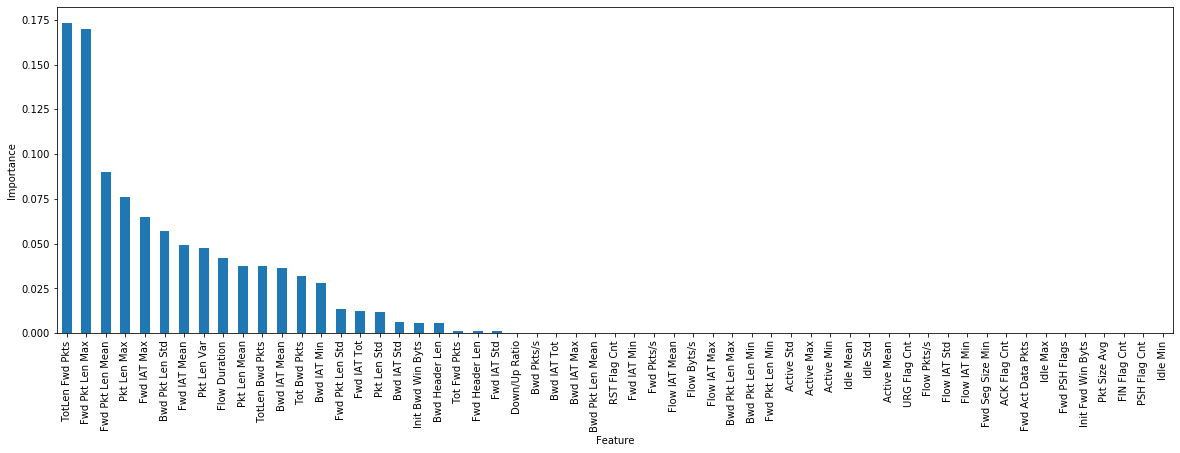

features importance list ['TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Pkt Len Max', 'Fwd IAT Max', 'Bwd Pkt Len Std', 'Fwd IAT Mean', 'Pkt Len Var', 'Flow Duration', 'Pkt Len Mean', 'TotLen Bwd Pkts', 'Bwd IAT Mean', 'Tot Bwd Pkts', 'Bwd IAT Min', 'Fwd Pkt Len Std', 'Fwd IAT Tot', 'Pkt Len Std', 'Bwd IAT Std', 'Init Bwd Win Byts', 'Bwd Header Len', 'Tot Fwd Pkts', 'Fwd Header Len', 'Fwd IAT Std', 'Down/Up Ratio', 'Bwd Pkts/s', 'Bwd IAT Tot', 'Bwd IAT Max', 'Bwd Pkt Len Mean', 'RST Flag Cnt', 'Fwd IAT Min', 'Fwd Pkts/s', 'Flow IAT Mean', 'Flow Byts/s', 'Flow IAT Max', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Fwd Pkt Len Min', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Active Mean', 'URG Flag Cnt', 'Flow Pkts/s', 'Flow IAT Std', 'Flow IAT Min', 'Fwd Seg Size Min', 'ACK Flag Cnt', 'Fwd Act Data Pkts', 'Idle Max', 'Fwd PSH Flags', 'Init Fwd Win Byts', 'Pkt Size Avg', 'FIN Flag Cnt', 'PSH Flag Cnt', 'Idle Min']
Test one feature performance metrics=1.000

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DataFrame before cleaning


,count,unique,top,freq
Protocol,331125,7,6,170066
Timestamp,331125,32069,01/03/2018 10:51:58,2050
Flow Duration,331125,159256,2,7258
Tot Fwd Pkts,331125,445,1,119503
Tot Bwd Pkts,331125,573,1,131599
TotLen Fwd Pkts,331125,5599,0,76892
TotLen Bwd Pkts,331125,10875,0,96519
Fwd Pkt Len Max,331125,2217,0,76892
Fwd Pkt Len Min,331125,200,0,173845
Fwd Pkt Len Mean,331125,12241,0,76892


DataFrame before missing values removal, shape (331125, 77)


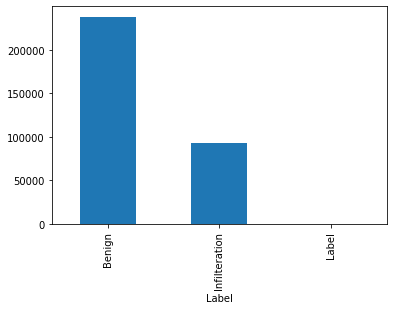

,Label,count
0,Benign,238037
1,Infilteration,93063
2,Label,25


0    0.718874
1    0.281051
2    0.000076
dtype: float64

DataFrame only missing values, shape (135260, 77)


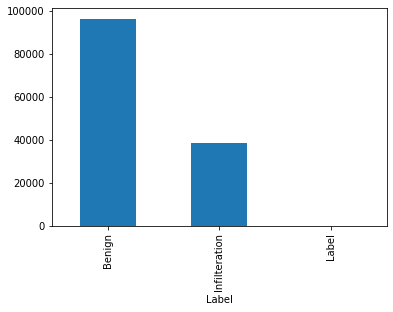

,Label,count
0,Benign,96455
1,Infilteration,38780
2,Label,25


0    0.713108
1    0.286707
2    0.000185
dtype: float64

DataFrame only missing values, shape (135260, 77)


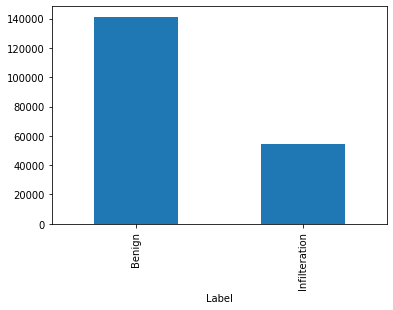

,Label,count
0,Benign,141323
1,Infilteration,54270


0    0.722536
1    0.277464
dtype: float64

DataFrame after missing values removal, shape (195593, 77)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,195593.0,1.952323e+07,3.972200e+07,1.0,247.0,471583.0,5185122.0,119999992.0
Tot Fwd Pkts,195593.0,7.570527e+00,8.046950e+01,1.0,1.0,3.0,9.0,12933.0
Tot Bwd Pkts,195593.0,8.624342e+00,1.870405e+02,0.0,1.0,2.0,7.0,26566.0
TotLen Fwd Pkts,195593.0,5.761479e+02,1.681583e+03,0.0,0.0,77.0,1128.0,162048.0
TotLen Bwd Pkts,195593.0,5.255782e+03,2.692398e+05,0.0,0.0,114.0,1581.0,38600000.0
Fwd Pkt Len Max,195593.0,2.545347e+02,3.113510e+02,0.0,0.0,48.0,602.0,1968.0
Fwd Pkt Len Min,195593.0,6.946808e+00,4.577602e+01,0.0,0.0,0.0,0.0,1460.0
Fwd Pkt Len Mean,195593.0,5.616259e+01,7.462786e+01,0.0,0.0,36.0,99.0,1460.0
Fwd Pkt Len Std,195593.0,8.278673e+01,1.039847e+02,0.0,0.0,23.0,189.0,1324.0
Bwd Pkt Len Max,195593.0,4.941902e+02,6.165464e+02,0.0,0.0,99.0,1173.0,65160.0


targets {'Benign': 0, 'Infilteration': 1}
Initial DataFrame target
Final DataFrame target
Initial X_train.shape, X_test.shape (68457, 76), (29339, 76)
quasi_constant_feat ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']
After quasi_constant_feat removal X_train.shape, X_test.shape (68457, 66), (29339, 66)
0
10
20
30
40
50
60
duplicated_feat ['Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'SYN Flag Cnt']
After duplicated_feat removal X_train.shape, X_test.shape (68457, 60), (29339, 60)
Test performance metrics=0.674046
Test performance clasification report
               precision    recall  f1-score   support

           0     0.8000    0.9877    0.8840     21168
           1     0.9186    0.3604    0.5177      8171

    accuracy                         0.8130     29339
   macro avg     0.8593    0.6740

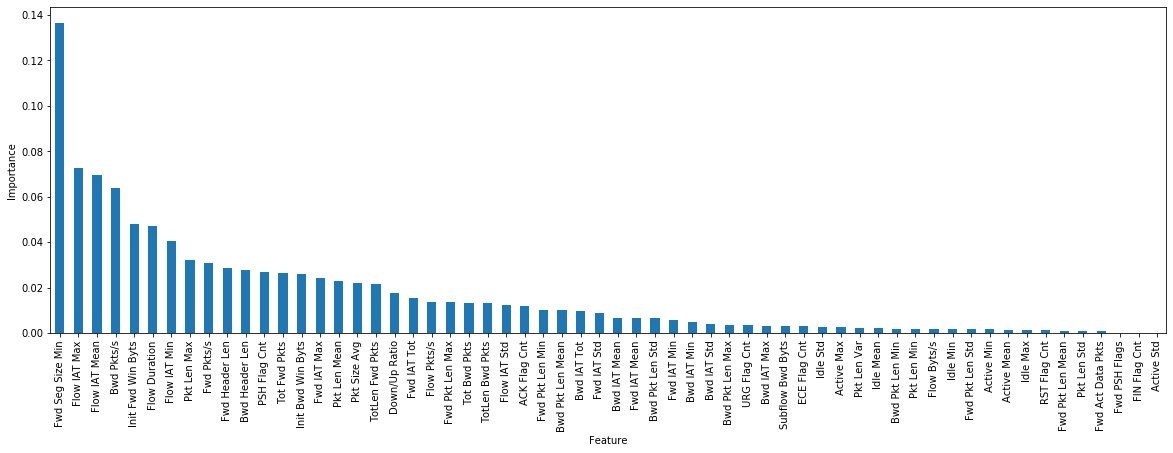

features importance list ['Fwd Seg Size Min', 'Flow IAT Max', 'Flow IAT Mean', 'Bwd Pkts/s', 'Init Fwd Win Byts', 'Flow Duration', 'Flow IAT Min', 'Pkt Len Max', 'Fwd Pkts/s', 'Fwd Header Len', 'Bwd Header Len', 'PSH Flag Cnt', 'Tot Fwd Pkts', 'Init Bwd Win Byts', 'Fwd IAT Max', 'Pkt Len Mean', 'Pkt Size Avg', 'TotLen Fwd Pkts', 'Down/Up Ratio', 'Fwd IAT Tot', 'Flow Pkts/s', 'Fwd Pkt Len Max', 'Tot Bwd Pkts', 'TotLen Bwd Pkts', 'Flow IAT Std', 'ACK Flag Cnt', 'Fwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd IAT Tot', 'Fwd IAT Std', 'Bwd IAT Mean', 'Fwd IAT Mean', 'Bwd Pkt Len Std', 'Fwd IAT Min', 'Bwd IAT Min', 'Bwd IAT Std', 'Bwd Pkt Len Max', 'URG Flag Cnt', 'Bwd IAT Max', 'Subflow Bwd Byts', 'ECE Flag Cnt', 'Idle Std', 'Active Max', 'Pkt Len Var', 'Idle Mean', 'Bwd Pkt Len Min', 'Pkt Len Min', 'Flow Byts/s', 'Idle Min', 'Fwd Pkt Len Std', 'Active Min', 'Active Mean', 'Idle Max', 'RST Flag Cnt', 'Fwd Pkt Len Mean', 'Pkt Len Std', 'Fwd Act Data Pkts', 'Fwd PSH Flags', 'FIN Flag Cnt', 'Acti

,count,mean,std,min,25%,50%,75%,max
Protocol,1048575.0,9.518465e+00,5.303721e+00,0.000000,6.000000,6.000000,1.700000e+01,1.700000e+01
Flow Duration,1048575.0,1.430739e+07,3.335503e+07,0.000000,413.000000,36896.000000,3.377079e+06,1.200000e+08
Tot Fwd Pkts,1048575.0,5.145998e+00,3.379921e+01,1.000000,1.000000,2.000000,5.000000e+00,9.021000e+03
Tot Bwd Pkts,1048575.0,6.419784e+00,9.786280e+01,0.000000,1.000000,1.000000,4.000000e+00,1.918100e+04
TotLen Fwd Pkts,1048575.0,4.354262e+02,2.881334e+04,0.000000,0.000000,44.000000,3.330000e+02,8.737314e+06
TotLen Bwd Pkts,1048575.0,4.925884e+03,1.399474e+05,0.000000,0.000000,99.000000,4.880000e+02,2.790523e+07
Fwd Pkt Len Max,1048575.0,1.514397e+02,2.774302e+02,0.000000,0.000000,41.000000,1.610000e+02,6.444000e+04
Fwd Pkt Len Min,1048575.0,1.397992e+01,2.382720e+01,0.000000,0.000000,0.000000,3.500000e+01,1.460000e+03
Fwd Pkt Len Mean,1048575.0,4.472574e+01,6.052267e+01,0.000000,0.000000,36.000000,5.366667e+01,1.652931e+04
Fwd Pkt Len Std,1048575.0,5.079972e+01,9.133395e+01,0.000000,0.000000,0.000000,8.192355e+01,1.840158e+04


DataFrame before missing values removal, shape (1048575, 77)


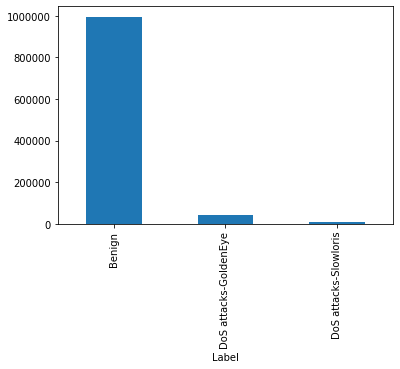

,Label,count
0,Benign,996077
1,DoS attacks-GoldenEye,41508
2,DoS attacks-Slowloris,10990


0    0.949934
1    0.039585
2    0.010481
dtype: float64

DataFrame only missing values, shape (587584, 77)


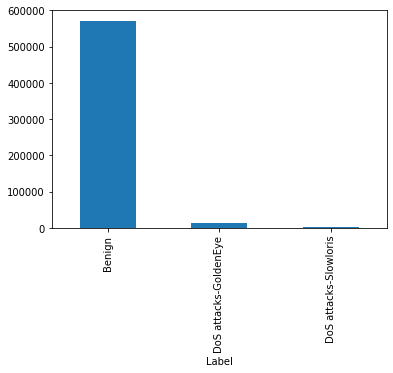

,Label,count
0,Benign,571490
1,DoS attacks-GoldenEye,13736
2,DoS attacks-Slowloris,2358


0    0.972610
1    0.023377
2    0.004013
dtype: float64

DataFrame only missing values, shape (587584, 77)


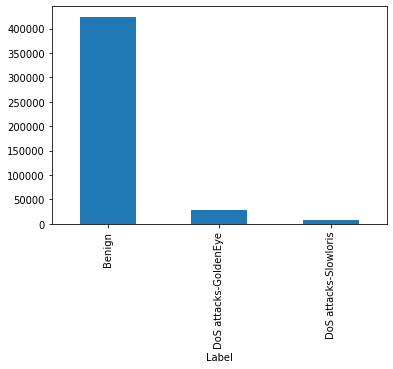

,Label,count
0,Benign,424481
1,DoS attacks-GoldenEye,27772
2,DoS attacks-Slowloris,8632


0    0.921013
1    0.060258
2    0.018729
dtype: float64

DataFrame after missing values removal, shape (460885, 77)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,460885.0,2.499822e+07,4.218554e+07,1.0,40830.0,2423995.0,17375914.0,120000000.0
Tot Fwd Pkts,460885.0,9.528286e+00,5.055683e+01,1.0,3.0,6.0,10.0,9021.0
Tot Bwd Pkts,460885.0,1.375199e+01,1.472848e+02,1.0,3.0,4.0,9.0,19181.0
TotLen Fwd Pkts,460885.0,9.466549e+02,4.345537e+04,0.0,97.0,399.0,1128.0,8737314.0
TotLen Bwd Pkts,460885.0,1.111773e+04,2.109283e+05,0.0,5.0,582.0,1874.0,27905234.0
Fwd Pkt Len Max,460885.0,3.090677e+02,3.601951e+02,0.0,66.0,196.0,520.0,64440.0
Fwd Pkt Len Min,460885.0,3.570348e-01,1.138695e+01,0.0,0.0,0.0,0.0,1460.0
Fwd Pkt Len Mean,460885.0,6.834229e+01,8.071488e+01,0.0,24.0,54.0,108.0,16529.0
Fwd Pkt Len Std,460885.0,1.132783e+02,1.089263e+02,0.0,33.0,93.0,203.0,18402.0
Bwd Pkt Len Max,460885.0,6.761865e+02,5.802138e+02,0.0,1.0,488.0,1173.0,2708.0


targets {'Benign': 0, 'DoS attacks-GoldenEye': 1, 'DoS attacks-Slowloris': 2}
Initial DataFrame target
Final DataFrame target
Initial X_train.shape, X_test.shape (161309, 76), (69133, 76)
quasi_constant_feat ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Pkt Len Min', 'CWE Flag Count', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']
After quasi_constant_feat removal X_train.shape, X_test.shape (161309, 65), (69133, 65)
0
10
20
30
40
50
60
duplicated_feat ['Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Byts', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'SYN Flag Cnt', 'ECE Flag Cnt']
After duplicated_feat removal X_train.shape, X_test.shape (161309, 57), (69133, 57)
Test performance metrics=0.999919
Test performance clasification report
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     63760
           1     1.0000    0.9998    0.9999      409

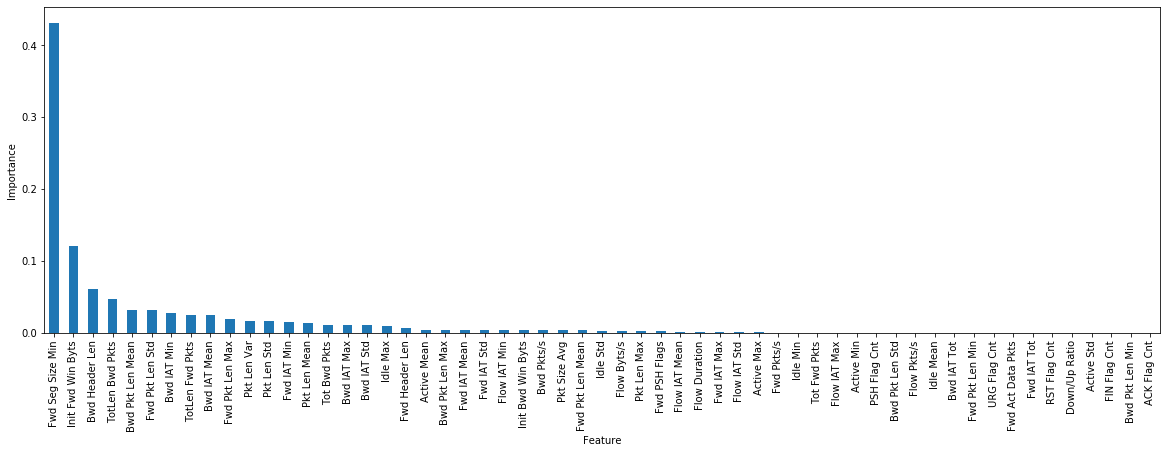

features importance list ['Fwd Seg Size Min', 'Init Fwd Win Byts', 'Bwd Header Len', 'TotLen Bwd Pkts', 'Bwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd IAT Min', 'TotLen Fwd Pkts', 'Bwd IAT Mean', 'Fwd Pkt Len Max', 'Pkt Len Var', 'Pkt Len Std', 'Fwd IAT Min', 'Pkt Len Mean', 'Tot Bwd Pkts', 'Bwd IAT Max', 'Bwd IAT Std', 'Idle Max', 'Fwd Header Len', 'Active Mean', 'Bwd Pkt Len Max', 'Fwd IAT Mean', 'Fwd IAT Std', 'Flow IAT Min', 'Init Bwd Win Byts', 'Bwd Pkts/s', 'Pkt Size Avg', 'Fwd Pkt Len Mean', 'Idle Std', 'Flow Byts/s', 'Pkt Len Max', 'Fwd PSH Flags', 'Flow IAT Mean', 'Flow Duration', 'Fwd IAT Max', 'Flow IAT Std', 'Active Max', 'Fwd Pkts/s', 'Idle Min', 'Tot Fwd Pkts', 'Flow IAT Max', 'Active Min', 'PSH Flag Cnt', 'Bwd Pkt Len Std', 'Flow Pkts/s', 'Idle Mean', 'Bwd IAT Tot', 'Fwd Pkt Len Min', 'URG Flag Cnt', 'Fwd Act Data Pkts', 'Fwd IAT Tot', 'RST Flag Cnt', 'Down/Up Ratio', 'Active Std', 'FIN Flag Cnt', 'Bwd Pkt Len Min', 'ACK Flag Cnt']
Test one feature performance metrics=0.665

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


New Test performance metrics=0.8130984003573829
Previous round performance metrics=0.6651087411125052
Increase in performance_metrics=0.14798965924487772
keep:  Init Fwd Win Byts

testing feature:  Bwd Header Len 2  out of  57
New Test performance metrics=0.9908756640654554
Previous round performance metrics=0.8130984003573829
Increase in performance_metrics=0.17777726370807245
keep:  Bwd Header Len

testing feature:  TotLen Bwd Pkts 3  out of  57
New Test performance metrics=0.9997506314368988
Previous round performance metrics=0.9908756640654554
Increase in performance_metrics=0.008874967371443443
keep:  TotLen Bwd Pkts

testing feature:  Bwd Pkt Len Mean 4  out of  57
New Test performance metrics=0.9997506314368988
Previous round performance metrics=0.9997506314368988
Increase in performance metrics=0.0
skip:  Bwd Pkt Len Mean

testing feature:  Fwd Pkt Len Std 5  out of  57
New Test performance metrics=0.9999133918535654
Previous round performance metrics=0.9997506314368988
Increas

,count,mean,std,min,25%,50%,75%,max
Protocol,1048575.0,9.117318e+00,5.113324e+00,0.000000e+00,6.000000,6.000000,1.700000e+01,1.700000e+01
Flow Duration,1048575.0,1.493482e+07,1.475475e+09,-8.282200e+11,509.000000,81591.000000,5.235859e+06,1.200000e+08
Tot Fwd Pkts,1048575.0,6.366313e+00,7.134356e+01,1.000000e+00,1.000000,2.000000,8.000000e+00,1.147800e+04
Tot Bwd Pkts,1048575.0,8.225241e+00,2.035931e+02,0.000000e+00,0.000000,1.000000,7.000000e+00,3.841800e+04
TotLen Fwd Pkts,1048575.0,3.988747e+02,4.970648e+03,0.000000e+00,0.000000,45.000000,4.550000e+02,3.982514e+06
TotLen Bwd Pkts,1048575.0,7.344806e+03,2.958085e+05,0.000000e+00,0.000000,103.000000,5.820000e+02,5.606950e+07
Fwd Pkt Len Max,1048575.0,1.771716e+02,2.674753e+02,0.000000e+00,0.000000,41.000000,1.890000e+02,3.804000e+03
Fwd Pkt Len Min,1048575.0,1.287449e+01,2.851018e+01,0.000000e+00,0.000000,0.000000,3.200000e+01,1.460000e+03
Fwd Pkt Len Mean,1048575.0,4.517549e+01,5.403132e+01,0.000000e+00,0.000000,36.000000,5.688889e+01,1.808419e+03
Fwd Pkt Len Std,1048575.0,5.461675e+01,8.664403e+01,0.000000e+00,0.000000,0.000000,8.544784e+01,1.032376e+03


DataFrame before missing values removal, shape (1048575, 77)


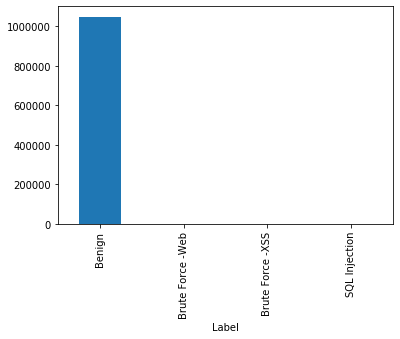

,Label,count
0,Benign,1048213
1,Brute Force -Web,249
2,Brute Force -XSS,79
3,SQL Injection,34


0    0.999655
1    0.000237
2    0.000075
3    0.000032
dtype: float64

DataFrame only missing values, shape (577969, 77)


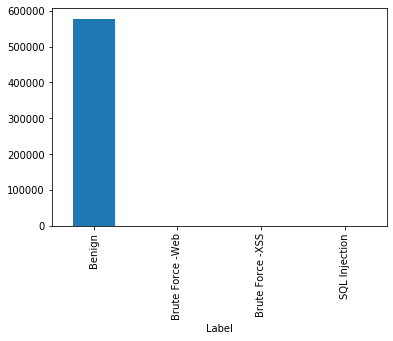

,Label,count
0,Benign,577815
1,Brute Force -Web,104
2,Brute Force -XSS,39
3,SQL Injection,11


0    0.999734
1    0.000180
2    0.000067
3    0.000019
dtype: float64

DataFrame only missing values, shape (577969, 77)


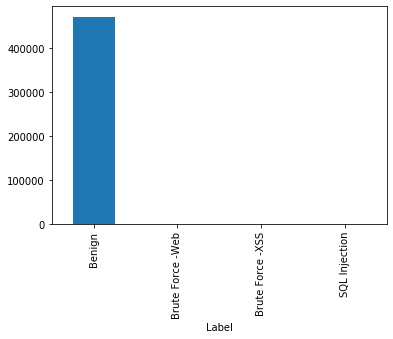

,Label,count
0,Benign,470296
1,Brute Force -Web,145
2,Brute Force -XSS,40
3,SQL Injection,23


0    0.999558
1    0.000308
2    0.000085
3    0.000049
dtype: float64

DataFrame after missing values removal, shape (470504, 77)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,470504.0,2.025615e+07,3.884741e+07,1.0,125639.75,2529682.5,5943015.50,119999993.0
Tot Fwd Pkts,470504.0,1.200643e+01,1.061883e+02,1.0,3.00,8.0,13.00,11478.0
Tot Bwd Pkts,470504.0,1.757705e+01,3.036735e+02,1.0,4.00,7.0,8.00,38418.0
TotLen Fwd Pkts,470504.0,8.426822e+02,7.394383e+03,0.0,97.00,599.0,1148.00,3982514.0
TotLen Bwd Pkts,470504.0,1.628843e+04,4.414356e+05,0.0,231.00,1441.0,1731.00,56069495.0
Fwd Pkt Len Max,470504.0,3.633375e+02,3.082863e+02,0.0,97.00,225.0,677.00,3804.0
Fwd Pkt Len Min,470504.0,2.931027e-01,1.221049e+01,0.0,0.00,0.0,0.00,1460.0
Fwd Pkt Len Mean,470504.0,7.076057e+01,6.286316e+01,0.0,24.00,61.0,104.00,1808.0
Fwd Pkt Len Std,470504.0,1.199728e+02,9.427270e+01,0.0,48.00,93.0,197.00,1032.0
Bwd Pkt Len Max,470504.0,7.366786e+02,5.690232e+02,0.0,197.00,858.0,1179.00,4012.0


targets {'Benign': 0, 'Brute Force -Web': 1, 'Brute Force -XSS': 2, 'SQL Injection': 3}
Initial DataFrame target
Final DataFrame target
Initial X_train.shape, X_test.shape (164676, 76), (70576, 76)
quasi_constant_feat ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Pkt Len Min', 'CWE Flag Count', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']
After quasi_constant_feat removal X_train.shape, X_test.shape (164676, 65), (70576, 65)
0
10
20
30
40
50
60
duplicated_feat ['Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Byts', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'SYN Flag Cnt', 'ECE Flag Cnt']
After duplicated_feat removal X_train.shape, X_test.shape (164676, 57), (70576, 57)
Test performance metrics=0.830592
Test performance clasification report
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     70545
           1     1.0000    0.9474    0.973

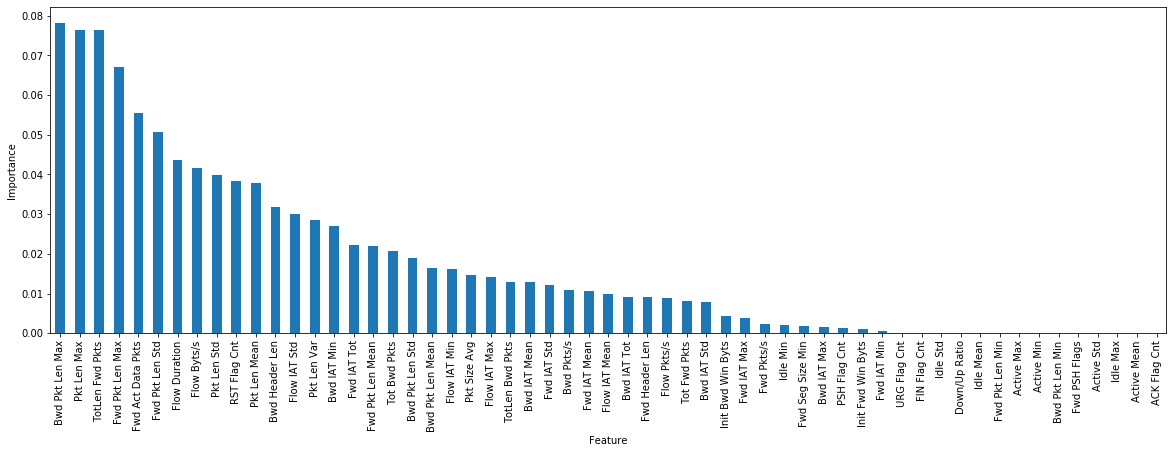

features importance list ['Bwd Pkt Len Max', 'Pkt Len Max', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Fwd Act Data Pkts', 'Fwd Pkt Len Std', 'Flow Duration', 'Flow Byts/s', 'Pkt Len Std', 'RST Flag Cnt', 'Pkt Len Mean', 'Bwd Header Len', 'Flow IAT Std', 'Pkt Len Var', 'Bwd IAT Min', 'Fwd IAT Tot', 'Fwd Pkt Len Mean', 'Tot Bwd Pkts', 'Bwd Pkt Len Std', 'Bwd Pkt Len Mean', 'Flow IAT Min', 'Pkt Size Avg', 'Flow IAT Max', 'TotLen Bwd Pkts', 'Bwd IAT Mean', 'Fwd IAT Std', 'Bwd Pkts/s', 'Fwd IAT Mean', 'Flow IAT Mean', 'Bwd IAT Tot', 'Fwd Header Len', 'Flow Pkts/s', 'Tot Fwd Pkts', 'Bwd IAT Std', 'Init Bwd Win Byts', 'Fwd IAT Max', 'Fwd Pkts/s', 'Idle Min', 'Fwd Seg Size Min', 'Bwd IAT Max', 'PSH Flag Cnt', 'Init Fwd Win Byts', 'Fwd IAT Min', 'URG Flag Cnt', 'FIN Flag Cnt', 'Idle Std', 'Down/Up Ratio', 'Idle Mean', 'Fwd Pkt Len Min', 'Active Max', 'Active Min', 'Bwd Pkt Len Min', 'Fwd PSH Flags', 'Active Std', 'Idle Max', 'Active Mean', 'ACK Flag Cnt']
Test one feature performance metrics=0.626

,count,mean,std,min,25%,50%,75%,max
Protocol,1048575.0,8.107557e+00,4.460625e+00,0.000000e+00,6.000000,6.000000,6.000000,1.700000e+01
Flow Duration,1048575.0,6.255555e+06,1.260291e+09,-9.190110e+11,7.000000,1023.000000,406669.000000,1.200000e+08
Tot Fwd Pkts,1048575.0,6.206622e+00,4.447851e+01,1.000000e+00,1.000000,2.000000,7.000000,5.115000e+03
Tot Bwd Pkts,1048575.0,7.211191e+00,1.048682e+02,0.000000e+00,1.000000,1.000000,6.000000,9.198000e+03
TotLen Fwd Pkts,1048575.0,4.479936e+02,1.573541e+04,0.000000e+00,0.000000,36.000000,455.000000,8.591554e+06
TotLen Bwd Pkts,1048575.0,4.521803e+03,1.515021e+05,0.000000e+00,0.000000,55.000000,768.000000,1.339773e+07
Fwd Pkt Len Max,1048575.0,1.745736e+02,2.876713e+02,0.000000e+00,0.000000,34.000000,199.000000,6.444000e+04
Fwd Pkt Len Min,1048575.0,8.389535e+00,1.948279e+01,0.000000e+00,0.000000,0.000000,0.000000,1.460000e+03
Fwd Pkt Len Mean,1048575.0,3.879579e+01,5.331882e+01,0.000000e+00,0.000000,25.666667,55.500000,1.121703e+04
Fwd Pkt Len Std,1048575.0,5.021107e+01,8.518887e+01,0.000000e+00,0.000000,0.000000,92.953393,1.576084e+04


DataFrame before missing values removal, shape (1048575, 77)


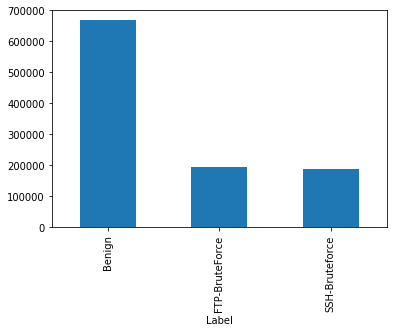

,Label,count
0,Benign,667626
1,FTP-BruteForce,193360
2,SSH-Bruteforce,187589


0    0.636698
1    0.184403
2    0.178899
dtype: float64

DataFrame only missing values, shape (347376, 77)


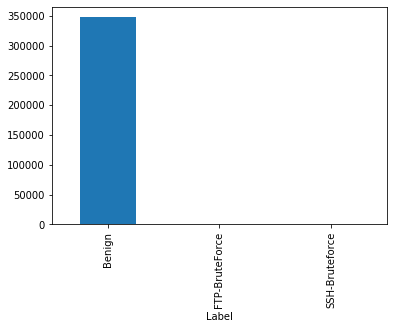

,Label,count
0,Benign,347365
1,FTP-BruteForce,6
2,SSH-Bruteforce,5


0    0.999968
1    0.000017
2    0.000014
dtype: float64

DataFrame only missing values, shape (347376, 77)


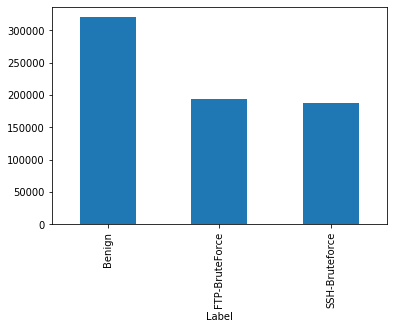

,Label,count
0,Benign,320205
1,FTP-BruteForce,193354
2,SSH-Bruteforce,187584


0    0.45669
1    0.27577
2    0.26754
dtype: float64

DataFrame after missing values removal, shape (701143, 77)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,701143.0,9.507238e+06,2.840230e+07,1.0,5.0,978.0,1659714.0,119999989.0
Tot Fwd Pkts,701143.0,8.432857e+00,5.423278e+01,1.0,1.0,3.0,10.0,5115.0
Tot Bwd Pkts,701143.0,1.044472e+01,1.281210e+02,1.0,1.0,1.0,8.0,9198.0
TotLen Fwd Pkts,701143.0,6.524036e+02,1.923979e+04,0.0,0.0,31.0,1138.0,8591554.0
TotLen Bwd Pkts,701143.0,6.726130e+03,1.852347e+05,0.0,0.0,0.0,1640.0,13397730.0
Fwd Pkt Len Max,701143.0,2.472463e+02,3.278419e+02,0.0,0.0,31.0,640.0,64440.0
Fwd Pkt Len Min,701143.0,8.597105e-02,5.194164e+00,0.0,0.0,0.0,0.0,1460.0
Fwd Pkt Len Mean,701143.0,4.488525e+01,6.184427e+01,0.0,0.0,10.0,87.0,11217.0
Fwd Pkt Len Std,701143.0,7.435191e+01,9.529381e+01,0.0,0.0,18.0,138.0,15761.0
Bwd Pkt Len Max,701143.0,4.672152e+02,5.549579e+02,0.0,0.0,0.0,976.0,1460.0


targets {'Benign': 0, 'FTP-BruteForce': 1, 'SSH-Bruteforce': 2}
Initial DataFrame target
Final DataFrame target
Initial X_train.shape, X_test.shape (245400, 76), (105172, 76)
quasi_constant_feat ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Pkt Len Min', 'CWE Flag Count', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']
After quasi_constant_feat removal X_train.shape, X_test.shape (245400, 65), (105172, 65)
0
10
20
30
40
50
60
duplicated_feat ['Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Byts', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'SYN Flag Cnt', 'ECE Flag Cnt']
After duplicated_feat removal X_train.shape, X_test.shape (245400, 57), (105172, 57)
Test performance metrics=0.999898
Test performance clasification report
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     48324
           1     0.9997    1.0000    0.9998     28733
         

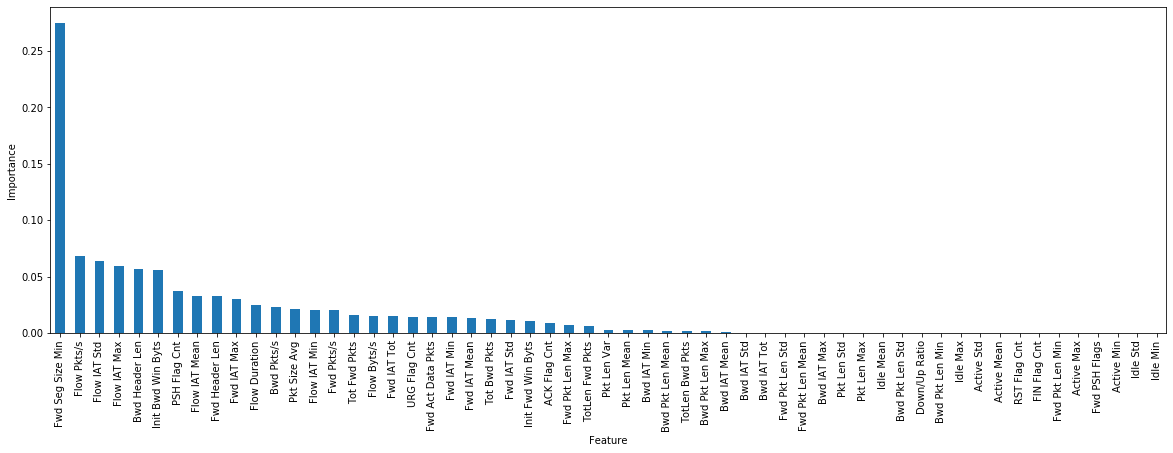

features importance list ['Fwd Seg Size Min', 'Flow Pkts/s', 'Flow IAT Std', 'Flow IAT Max', 'Bwd Header Len', 'Init Bwd Win Byts', 'PSH Flag Cnt', 'Flow IAT Mean', 'Fwd Header Len', 'Fwd IAT Max', 'Flow Duration', 'Bwd Pkts/s', 'Pkt Size Avg', 'Flow IAT Min', 'Fwd Pkts/s', 'Tot Fwd Pkts', 'Flow Byts/s', 'Fwd IAT Tot', 'URG Flag Cnt', 'Fwd Act Data Pkts', 'Fwd IAT Min', 'Fwd IAT Mean', 'Tot Bwd Pkts', 'Fwd IAT Std', 'Init Fwd Win Byts', 'ACK Flag Cnt', 'Fwd Pkt Len Max', 'TotLen Fwd Pkts', 'Pkt Len Var', 'Pkt Len Mean', 'Bwd IAT Min', 'Bwd Pkt Len Mean', 'TotLen Bwd Pkts', 'Bwd Pkt Len Max', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Tot', 'Fwd Pkt Len Std', 'Fwd Pkt Len Mean', 'Bwd IAT Max', 'Pkt Len Std', 'Pkt Len Max', 'Idle Mean', 'Bwd Pkt Len Std', 'Down/Up Ratio', 'Bwd Pkt Len Min', 'Idle Max', 'Active Std', 'Active Mean', 'RST Flag Cnt', 'FIN Flag Cnt', 'Fwd Pkt Len Min', 'Active Max', 'Fwd PSH Flags', 'Active Min', 'Idle Std', 'Idle Min']
Test one feature performance metrics=0.997

,count,mean,std,min,25%,50%,75%,max
Protocol,1048575.0,6.037952e+00,6.495848e-01,0.000000,6.000000,6.000000,6.000000,1.700000e+01
Flow Duration,1048575.0,3.990401e+05,6.630337e+06,2.000000,1408.000000,4720.000000,14649.000000,1.200000e+08
Tot Fwd Pkts,1048575.0,1.968099e+02,4.899047e+03,1.000000,2.000000,3.000000,5.000000,3.096290e+05
Tot Bwd Pkts,1048575.0,1.309663e+00,1.477423e+00,0.000000,0.000000,0.000000,2.000000,1.240000e+02
TotLen Fwd Pkts,1048575.0,6.563581e+03,1.567596e+05,0.000000,0.000000,247.000000,935.000000,9.908128e+06
TotLen Bwd Pkts,1048575.0,2.486527e+02,3.257857e+02,0.000000,0.000000,0.000000,316.000000,9.121000e+03
Fwd Pkt Len Max,1048575.0,3.666938e+02,4.226960e+02,0.000000,0.000000,32.000000,935.000000,2.224000e+03
Fwd Pkt Len Min,1048575.0,2.549479e-01,8.978105e+00,0.000000,0.000000,0.000000,0.000000,9.760000e+02
Fwd Pkt Len Mean,1048575.0,7.977144e+01,8.511139e+01,0.000000,0.000000,32.000000,187.000000,9.760000e+02
Fwd Pkt Len Std,1048575.0,1.699519e+02,1.887000e+02,0.000000,0.000000,0.000000,418.144712,6.901362e+02


DataFrame before missing values removal, shape (1048575, 77)


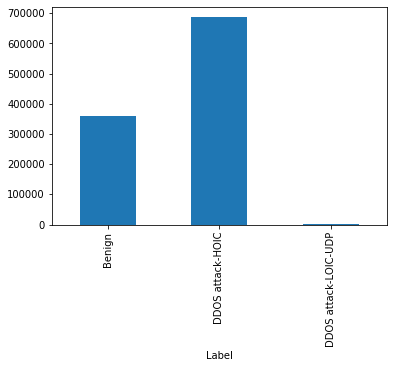

,Label,count
0,Benign,360833
1,DDOS attack-HOIC,686012
2,DDOS attack-LOIC-UDP,1730


0    0.344117
1    0.654233
2    0.001650
dtype: float64

DataFrame only missing values, shape (525993, 77)


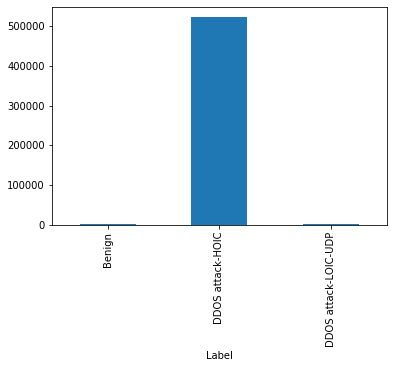

,Label,count
0,Benign,2001
1,DDOS attack-HOIC,522262
2,DDOS attack-LOIC-UDP,1730


0    0.003804
1    0.992907
2    0.003289
dtype: float64

DataFrame only missing values, shape (525993, 77)


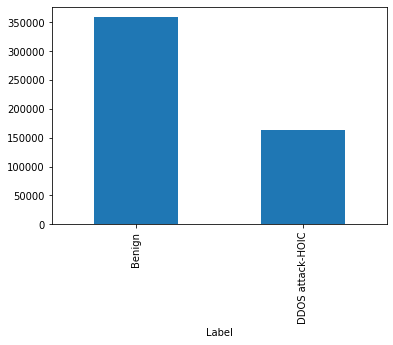

,Label,count
0,Benign,358832
1,DDOS attack-HOIC,163750


0    0.686652
1    0.313348
dtype: float64

DataFrame after missing values removal, shape (522582, 77)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,522582.0,11054.232635,456491.206679,3.0,1290.00,2981.0,14449.00,117901523.0
Tot Fwd Pkts,522582.0,4.372944,0.962404,1.0,3.00,5.0,5.00,148.0
Tot Bwd Pkts,522582.0,2.627850,0.956982,1.0,2.00,2.0,4.00,124.0
TotLen Fwd Pkts,522582.0,735.375734,296.747550,0.0,324.00,935.0,935.00,13488.0
TotLen Bwd Pkts,522582.0,498.924230,296.814248,0.0,291.00,316.0,935.00,9121.0
Fwd Pkt Len Max,522582.0,735.269665,295.859489,0.0,324.00,935.0,935.00,2224.0
Fwd Pkt Len Min,522582.0,0.002480,1.364556,0.0,0.00,0.0,0.00,976.0
Fwd Pkt Len Mean,522582.0,159.557084,41.053684,0.0,108.00,187.0,187.00,976.0
Fwd Pkt Len Std,522582.0,340.915498,114.441087,0.0,187.00,418.0,418.00,482.0
Bwd Pkt Len Max,522582.0,498.794059,295.841675,0.0,291.00,316.0,935.00,1104.0


targets {'Benign': 0, 'DDOS attack-HOIC': 1}
Initial DataFrame target
Final DataFrame target
Initial X_train.shape, X_test.shape (182903, 76), (78388, 76)
quasi_constant_feat ['Fwd Pkt Len Min', 'Bwd Pkt Len Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Pkt Len Min', 'Pkt Len Max', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Init Fwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']
After quasi_constant_feat removal X_train.shape, X_test.shape (182903, 43), (78388, 43)
0
10
20
30
40
duplicated_feat ['Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Byts', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg']
After duplicated_feat removal X_train.s

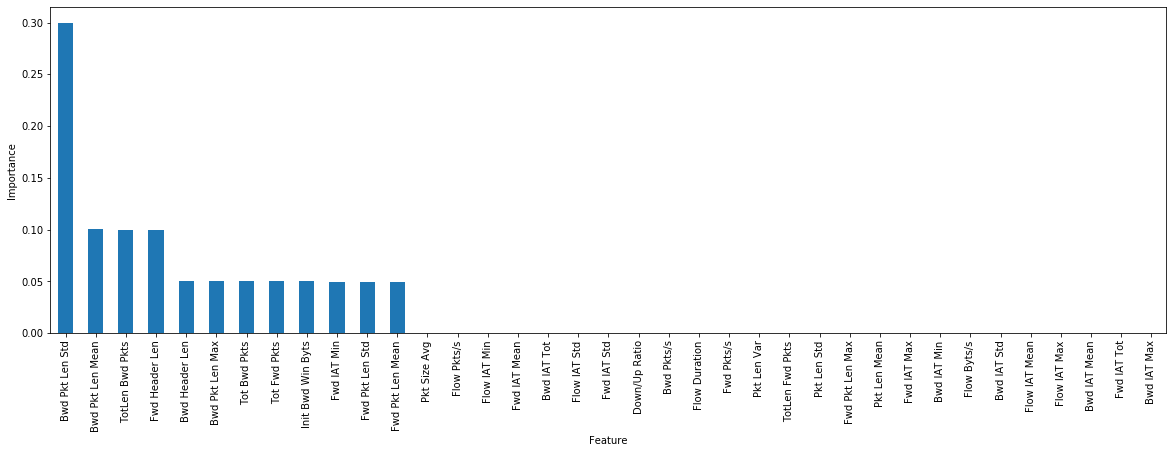

features importance list ['Bwd Pkt Len Std', 'Bwd Pkt Len Mean', 'TotLen Bwd Pkts', 'Fwd Header Len', 'Bwd Header Len', 'Bwd Pkt Len Max', 'Tot Bwd Pkts', 'Tot Fwd Pkts', 'Init Bwd Win Byts', 'Fwd IAT Min', 'Fwd Pkt Len Std', 'Fwd Pkt Len Mean', 'Pkt Size Avg', 'Flow Pkts/s', 'Flow IAT Min', 'Fwd IAT Mean', 'Bwd IAT Tot', 'Flow IAT Std', 'Fwd IAT Std', 'Down/Up Ratio', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkts/s', 'Pkt Len Var', 'TotLen Fwd Pkts', 'Pkt Len Std', 'Fwd Pkt Len Max', 'Pkt Len Mean', 'Fwd IAT Max', 'Bwd IAT Min', 'Flow Byts/s', 'Bwd IAT Std', 'Flow IAT Mean', 'Flow IAT Max', 'Bwd IAT Mean', 'Fwd IAT Tot', 'Bwd IAT Max']
Test one feature performance metrics=1.000000
Test one feature performance clasification report
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     53667
           1     1.0000    1.0000    1.0000     24721

    accuracy                         1.0000     78388
   macro avg     1.0000    1.0000    1.0000  

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DataFrame before cleaning


,count,unique,top,freq
Protocol,613104,7,6,215652
Timestamp,613104,31855,28/02/2018 01:48:05,3055
Flow Duration,613104,180723,2,19652
Tot Fwd Pkts,613104,549,1,165320
Tot Bwd Pkts,613104,749,1,179440
TotLen Fwd Pkts,613104,7156,0,88273
TotLen Bwd Pkts,613104,14002,0,118872
Fwd Pkt Len Max,613104,2538,0,88273
Fwd Pkt Len Min,613104,203,0,219642
Fwd Pkt Len Mean,613104,24587,0,88273


DataFrame before missing values removal, shape (613104, 77)


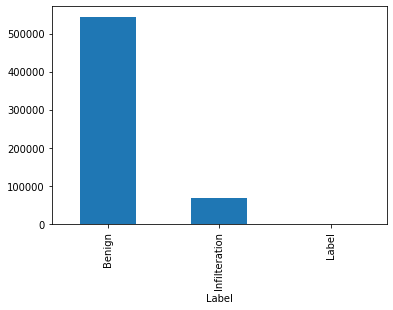

,Label,count
0,Benign,544200
1,Infilteration,68871
2,Label,33


0    0.887614
1    0.112332
2    0.000054
dtype: float64

DataFrame only missing values, shape (216150, 77)


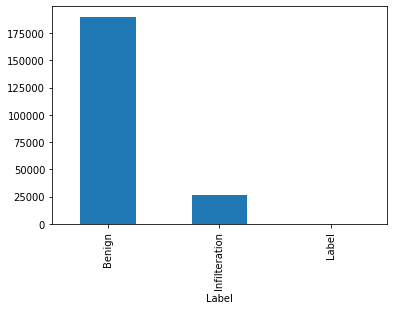

,Label,count
0,Benign,190100
1,Infilteration,26017
2,Label,33


0    0.879482
1    0.120365
2    0.000153
dtype: float64

DataFrame only missing values, shape (216150, 77)


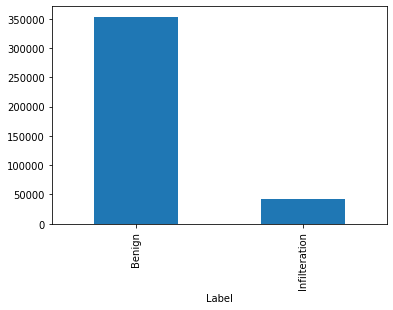

,Label,count
0,Benign,353364
1,Infilteration,42743


0    0.892092
1    0.107908
dtype: float64

DataFrame after missing values removal, shape (396107, 77)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,396107.0,1.793684e+07,3.808248e+07,1.0,248.0,94503.0,5414140.0,119999957.0
Tot Fwd Pkts,396107.0,6.963452e+00,6.571245e+01,1.0,1.0,3.0,8.0,11404.0
Tot Bwd Pkts,396107.0,8.114237e+00,1.687484e+02,0.0,1.0,1.0,7.0,24279.0
TotLen Fwd Pkts,396107.0,6.301886e+02,2.578076e+04,0.0,0.0,51.0,864.0,13486697.0
TotLen Bwd Pkts,396107.0,5.165306e+03,2.411006e+05,0.0,0.0,96.0,1581.0,34937934.0
Fwd Pkt Len Max,396107.0,2.363182e+02,3.204927e+02,0.0,0.0,45.0,432.0,10024.0
Fwd Pkt Len Min,396107.0,8.408031e+00,3.592669e+01,0.0,0.0,0.0,0.0,1460.0
Fwd Pkt Len Mean,396107.0,5.516075e+01,7.273955e+01,0.0,0.0,36.0,80.0,2947.0
Fwd Pkt Len Std,396107.0,7.734364e+01,1.068432e+02,0.0,0.0,18.0,150.0,3311.0
Bwd Pkt Len Max,396107.0,4.831506e+02,6.169867e+02,0.0,0.0,84.0,1173.0,31469.0


targets {'Benign': 0, 'Infilteration': 1}
Initial DataFrame target
Final DataFrame target
Initial X_train.shape, X_test.shape (138637, 76), (59417, 76)
quasi_constant_feat ['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']
After quasi_constant_feat removal X_train.shape, X_test.shape (138637, 68), (59417, 68)
0
10
20
30
40
50
60
duplicated_feat ['Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'SYN Flag Cnt', 'CWE Flag Count']
After duplicated_feat removal X_train.shape, X_test.shape (138637, 61), (59417, 61)
Test performance metrics=0.504955
Test performance clasification report
               precision    recall  f1-score   support

           0     0.8949    0.9999    0.9445     53119
           1     0.9265    0.0100    0.0198      6298

    accuracy                         0.8950     59417
   macro avg     0.9107    0.5050    0.4822    

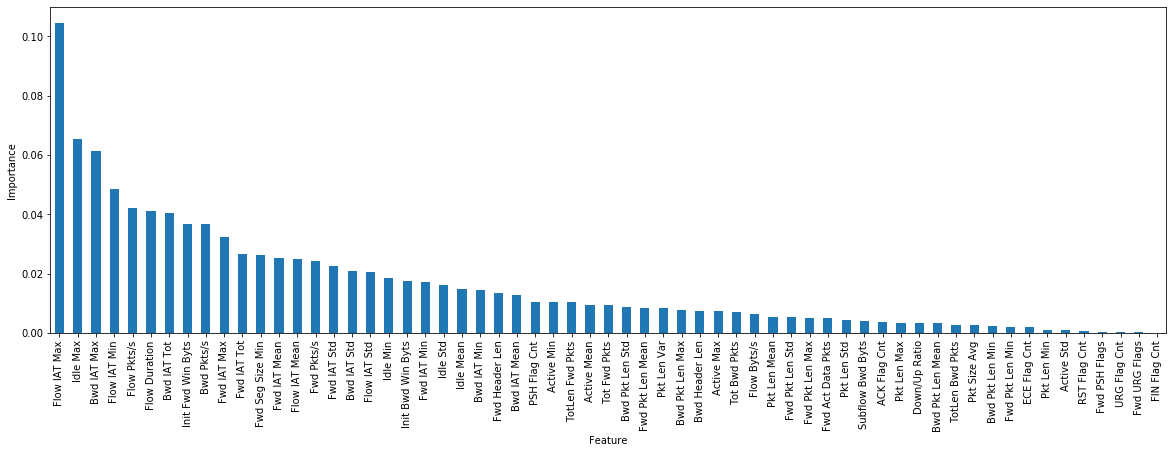

features importance list ['Flow IAT Max', 'Idle Max', 'Bwd IAT Max', 'Flow IAT Min', 'Flow Pkts/s', 'Flow Duration', 'Bwd IAT Tot', 'Init Fwd Win Byts', 'Bwd Pkts/s', 'Fwd IAT Max', 'Fwd IAT Tot', 'Fwd Seg Size Min', 'Fwd IAT Mean', 'Flow IAT Mean', 'Fwd Pkts/s', 'Fwd IAT Std', 'Bwd IAT Std', 'Flow IAT Std', 'Idle Min', 'Init Bwd Win Byts', 'Fwd IAT Min', 'Idle Std', 'Idle Mean', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd IAT Mean', 'PSH Flag Cnt', 'Active Min', 'TotLen Fwd Pkts', 'Active Mean', 'Tot Fwd Pkts', 'Bwd Pkt Len Std', 'Fwd Pkt Len Mean', 'Pkt Len Var', 'Bwd Pkt Len Max', 'Bwd Header Len', 'Active Max', 'Tot Bwd Pkts', 'Flow Byts/s', 'Pkt Len Mean', 'Fwd Pkt Len Std', 'Fwd Pkt Len Max', 'Fwd Act Data Pkts', 'Pkt Len Std', 'Subflow Bwd Byts', 'ACK Flag Cnt', 'Pkt Len Max', 'Down/Up Ratio', 'Bwd Pkt Len Mean', 'TotLen Bwd Pkts', 'Pkt Size Avg', 'Bwd Pkt Len Min', 'Fwd Pkt Len Min', 'ECE Flag Cnt', 'Pkt Len Min', 'Active Std', 'RST Flag Cnt', 'Fwd PSH Flags', 'URG Flag Cnt', 'Fwd UR

In [18]:
selected_features = {}
for dataset_file in sorted(glob(f'{dataset_name}/*.csv')):
  print('#' * 80)
  print('New datafile:', dataset_file)
  print('#' * 80)
  if dataset_file == f'{dataset_name}/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv':
    columns_to_remove = quasi_constant_features + duplicated_features + extra_features
    sample_fraction = 0.05
  else:
    columns_to_remove = extra_features
    sample_fraction = 0.5
  columns = pd.read_csv(dataset_file, index_col=0, nrows=0).columns.tolist()
  usecols = []
  for column in columns:
    if column not in columns_to_remove:
      usecols.append(column)    
  df = pd.read_csv(dataset_file, usecols=usecols)
  df = clean.get_clean_df(df, verbose=1)
  df['target'] = df.pop('Label')
  feature_list = clean.get_feature_list(df, tolerance=0.001, sample_fraction=sample_fraction)
  del df
  selected_features[dataset_file] = feature_list

Find the union set of selected features across all data files

In [19]:
selected_features_common = []
for dataset_file, features_list in sorted(selected_features.items()):
  print(f'Merging features for {dataset_file}', features_list)
  for feature in features_list:
    if feature not in selected_features_common:
      selected_features_common.append(feature)

Merging features for cse-cic-ids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv ['Flow Byts/s', 'Flow Pkts/s', 'Flow Duration']
Merging features for cse-cic-ids2018/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv ['Fwd Pkt Len Std', 'Bwd IAT Min', 'PSH Flag Cnt']
Merging features for cse-cic-ids2018/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv ['RST Flag Cnt', 'Bwd Pkt Len Max', 'Pkt Len Std']
Merging features for cse-cic-ids2018/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv ['TotLen Fwd Pkts']
Merging features for cse-cic-ids2018/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv ['Fwd Seg Size Min', 'Init Fwd Win Byts', 'Pkt Len Max', 'Bwd Header Len', 'Init Bwd Win Byts', 'ECE Flag Cnt']
Merging features for cse-cic-ids2018/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv ['Fwd Seg Size Min', 'Init Fwd Win Byts', 'Bwd Header Len', 'TotLen Bwd Pkts']
Merging features for cse-cic-ids2018/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv ['Bwd Pkt Len Max', 'Pkt Len Max', '

In [20]:
print(f'Number of selected features {len(selected_features_common)}')
for feature in selected_features_common:
  print(feature)

Number of selected features 19
Flow Byts/s
Flow Pkts/s
Flow Duration
Fwd Pkt Len Std
Bwd IAT Min
PSH Flag Cnt
RST Flag Cnt
Bwd Pkt Len Max
Pkt Len Std
TotLen Fwd Pkts
Fwd Seg Size Min
Init Fwd Win Byts
Pkt Len Max
Bwd Header Len
Init Bwd Win Byts
ECE Flag Cnt
TotLen Bwd Pkts
Bwd Pkt Len Std
Flow IAT Max


Save selected features data into new csv files

In [21]:
dataset_name_clean = dataset_name + '-clean'

In [22]:
!mkdir -p $dataset_name_clean

################################################################################
New datafile: cse-cic-ids2018/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
################################################################################
DataFrame before cleaning


,count,mean,std,min,25%,50%,75%,max
Flow Duration,1048575.0,1.151421e+07,3.012113e+07,0.000000,516.000000,11242.000000,2.210150e+06,1.200000e+08
TotLen Fwd Pkts,1048575.0,3.920838e+02,2.159779e+03,0.000000,0.000000,63.000000,3.650000e+02,1.100627e+06
TotLen Bwd Pkts,1048575.0,5.271275e+03,3.088768e+05,0.000000,0.000000,129.000000,5.820000e+02,1.010000e+08
Fwd Pkt Len Std,1048575.0,7.796052e+01,9.693329e+01,0.000000,0.000000,0.000000,1.882162e+02,1.032376e+03
Bwd Pkt Len Max,1048575.0,3.471215e+02,5.037283e+02,0.000000,0.000000,112.000000,4.880000e+02,1.460000e+03
Bwd Pkt Len Std,1048575.0,1.257108e+02,1.948650e+02,0.000000,0.000000,0.000000,2.305168e+02,1.032376e+03
Flow Byts/s,1046017.0,inf,NaN,0.000000,0.000000,1058.917131,4.161332e+04,inf
Flow Pkts/s,1048575.0,inf,NaN,0.016669,6.795945,619.140280,4.024145e+03,inf
Flow IAT Max,1048575.0,6.325742e+06,1.896529e+07,0.000000,500.000000,10283.000000,9.531650e+05,1.200000e+08
Bwd IAT Min,1048575.0,1.276746e+05,2.047740e+06,0.000000,0.000000,0.000000,6.900000e+01,1.200000e+08


DataFrame before missing values removal, shape (1048575, 20)


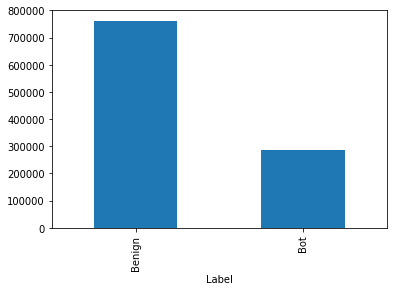

,Label,count
0,Benign,762384
1,Bot,286191


0    0.727067
1    0.272933
dtype: float64

DataFrame only missing values, shape (514380, 20)


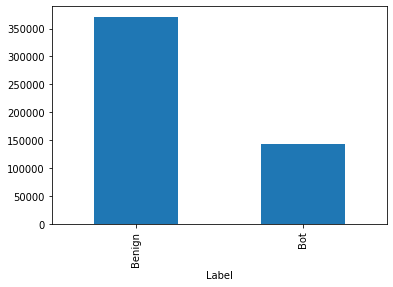

,Label,count
0,Benign,371203
1,Bot,143177


0    0.721651
1    0.278349
dtype: float64

DataFrame only missing values, shape (514380, 20)


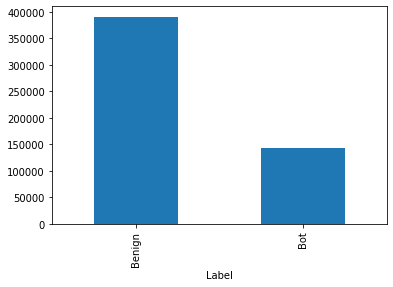

,Label,count
0,Benign,390961
1,Bot,143014


0    0.732171
1    0.267829
dtype: float64

DataFrame after missing values removal, shape (533975, 20)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,533975.0,1.290131e+07,3.232201e+07,1.0,10910.0,1271166.0,3959368.0,119999997.0
TotLen Fwd Pkts,533975.0,7.390618e+02,2.877147e+03,0.0,326.0,364.0,1144.0,1100627.0
TotLen Bwd Pkts,533975.0,1.015331e+04,4.313215e+05,0.0,129.0,488.0,1581.0,101000000.0
Fwd Pkt Len Std,533975.0,1.518660e+02,8.513680e+01,0.0,83.0,188.0,210.0,1032.0
Bwd Pkt Len Max,533975.0,6.430848e+02,5.620702e+02,0.0,112.0,460.0,1173.0,1460.0
Bwd Pkt Len Std,533975.0,2.465516e+02,2.114103e+02,0.0,54.0,211.0,430.0,1032.0
Flow Byts/s,533975.0,1.343109e+05,2.464592e+06,0.0,442.0,1377.0,40394.0,95000000.0
Flow Pkts/s,533975.0,8.222197e+03,8.759467e+04,0.0,5.0,11.0,642.0,3000000.0
Flow IAT Max,533975.0,4.315798e+06,1.292722e+07,1.0,9953.0,582987.0,973218.0,120000000.0
Bwd IAT Min,533975.0,1.377421e+05,1.587849e+06,0.0,1.0,40.0,107278.0,108000000.0


################################################################################
New datafile: cse-cic-ids2018/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
################################################################################


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,6,7,11,12,15,16,17,20,31,37,41,43,47,48,52,67,68,70) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DataFrame before cleaning


,count,unique,top,freq
Flow Duration,1048575,453876,2,58706
TotLen Fwd Pkts,1048575,481,0,572790
TotLen Bwd Pkts,1048575,862,0,572823
Fwd Pkt Len Std,1.04858e+06,974,0,572802
Bwd Pkt Len Max,1048575,269,0,572823
Bwd Pkt Len Std,1.04858e+06,1355,0,572837
Flow Byts/s,1.04858e+06,466738,0,572788
Flow Pkts/s,1.04858e+06,490239,1e+06,58706
Flow IAT Max,1048575,408374,2,58706
Bwd IAT Min,1048575,39421,0,570418


DataFrame before missing values removal, shape (1048575, 20)


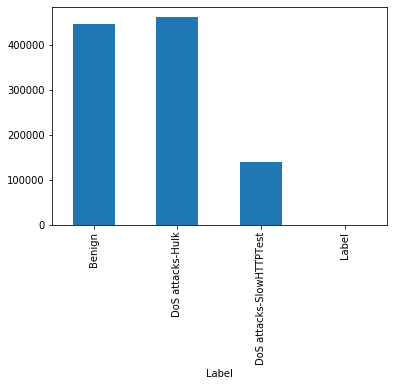

,Label,count
0,Benign,446772
1,DoS attacks-Hulk,461912
2,DoS attacks-SlowHTTPTest,139890
3,Label,1


0    4.260754e-01
1    4.405140e-01
2    1.334096e-01
3    9.536752e-07
dtype: float64

DataFrame only missing values, shape (438027, 20)


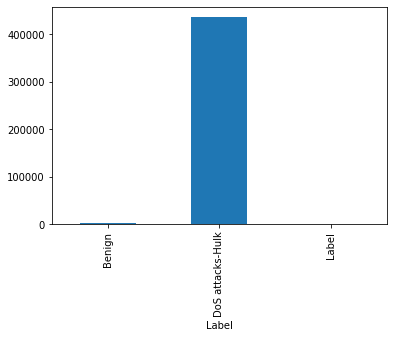

,Label,count
0,Benign,1926
1,DoS attacks-Hulk,436100
2,Label,1


0    0.004397
1    0.995601
2    0.000002
dtype: float64

DataFrame only missing values, shape (438027, 20)


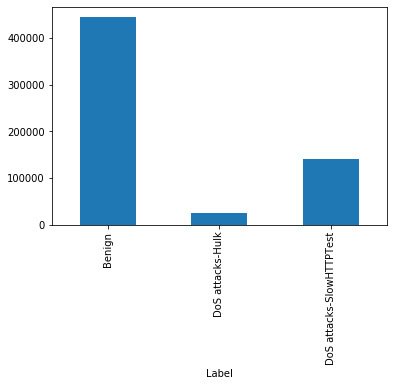

,Label,count
0,Benign,444846
1,DoS attacks-Hulk,25812
2,DoS attacks-SlowHTTPTest,139890


0    0.728601
1    0.042277
2    0.229122
dtype: float64

DataFrame after missing values removal, shape (610548, 20)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,610548.0,4.139883e+06,7.486029e+06,1.0,49528.75,4216831.5,4433755.75,112641773.0
TotLen Fwd Pkts,610548.0,6.930354e+02,4.008065e+02,0.0,341.00,935.0,935.00,16544.0
TotLen Bwd Pkts,610548.0,3.301963e+02,2.853256e+03,0.0,293.00,341.0,370.00,1566268.0
Fwd Pkt Len Std,610548.0,3.119801e+02,1.787660e+02,0.0,178.00,418.0,418.00,600.0
Bwd Pkt Len Max,610548.0,2.898699e+02,2.010773e+02,0.0,292.00,335.0,363.00,8688.0
Bwd Pkt Len Std,610548.0,1.600290e+02,1.035251e+02,0.0,151.00,188.0,207.00,1243.0
Flow Byts/s,610548.0,1.396573e+03,1.315166e+04,0.0,196.00,293.0,310.00,1730137.0
Flow Pkts/s,610548.0,1.683488e+05,3.444093e+05,0.0,2.00,2.0,136.00,2000000.0
Flow IAT Max,610548.0,4.006152e+06,7.414618e+06,1.0,38761.75,4107404.0,4264239.00,91300000.0
Bwd IAT Min,610548.0,5.384431e+03,1.972129e+05,0.0,27.00,376.0,5624.00,91300000.0


################################################################################
New datafile: cse-cic-ids2018/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
################################################################################
DataFrame before cleaning


,count,mean,std,min,25%,50%,75%,max
Flow Duration,1048575.0,1.872781e+07,3.633651e+07,0.000000,512.000000,95118.000000,5.284498e+06,1.200000e+08
TotLen Fwd Pkts,1048575.0,4.139611e+02,2.152351e+03,0.000000,0.000000,45.000000,4.550000e+02,1.582330e+06
TotLen Bwd Pkts,1048575.0,9.754156e+03,4.400548e+05,0.000000,0.000000,101.000000,6.995000e+02,1.563604e+08
Fwd Pkt Len Std,1048575.0,5.634453e+01,8.955282e+01,0.000000,0.000000,0.000000,9.218699e+01,1.405737e+03
Bwd Pkt Len Max,1048575.0,3.688990e+02,5.203575e+02,0.000000,0.000000,95.000000,4.880000e+02,4.012000e+03
Bwd Pkt Len Std,1048575.0,1.306667e+02,2.064388e+02,0.000000,0.000000,0.000000,2.440000e+02,2.316329e+03
Flow Byts/s,1044821.0,inf,NaN,0.000000,0.000000,783.262429,5.458631e+04,inf
Flow Pkts/s,1048575.0,inf,NaN,0.016668,2.269405,49.393692,6.006006e+03,inf
Flow IAT Max,1048575.0,1.192801e+07,2.621886e+07,0.000000,348.000000,65553.000000,4.898036e+06,1.199916e+08
Bwd IAT Min,1048575.0,1.354203e+05,2.089117e+06,0.000000,0.000000,0.000000,1.890000e+02,1.199444e+08


DataFrame before missing values removal, shape (1048575, 20)


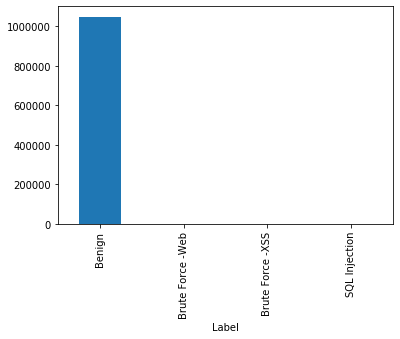

,Label,count
0,Benign,1048009
1,Brute Force -Web,362
2,Brute Force -XSS,151
3,SQL Injection,53


0    0.999460
1    0.000345
2    0.000144
3    0.000051
dtype: float64

DataFrame only missing values, shape (573167, 20)


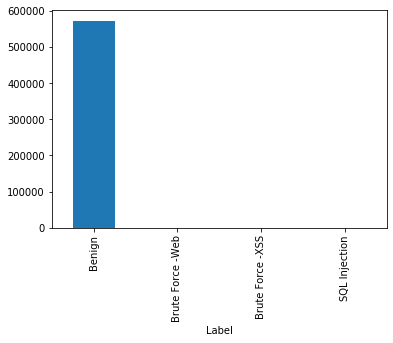

,Label,count
0,Benign,572834
1,Brute Force -Web,237
2,Brute Force -XSS,78
3,SQL Injection,18


0    0.999419
1    0.000413
2    0.000136
3    0.000031
dtype: float64

DataFrame only missing values, shape (573167, 20)


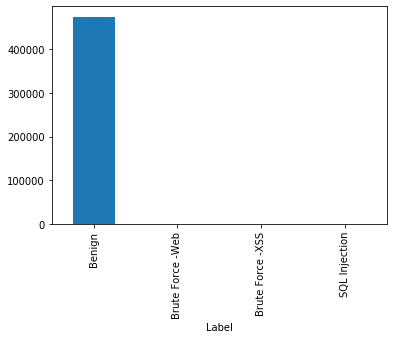

,Label,count
0,Benign,475016
1,Brute Force -Web,125
2,Brute Force -XSS,73
3,SQL Injection,35


0    0.999510
1    0.000263
2    0.000154
3    0.000074
dtype: float64

DataFrame after missing values removal, shape (475249, 20)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,475249.0,1.971589e+07,3.840013e+07,1.0,107036.0,2761539.0,5814053.0,119999967.0
TotLen Fwd Pkts,475249.0,8.666441e+02,3.133311e+03,0.0,97.0,597.0,1156.0,1582330.0
TotLen Bwd Pkts,475249.0,2.143635e+04,6.534603e+05,0.0,231.0,1581.0,1731.0,156360426.0
Fwd Pkt Len Std,475249.0,1.226308e+02,9.786797e+01,0.0,48.0,93.0,197.0,1406.0
Bwd Pkt Len Max,475249.0,7.518492e+02,5.695945e+02,0.0,156.0,1068.0,1179.0,4012.0
Bwd Pkt Len Std,475249.0,2.881594e+02,2.204842e+02,0.0,70.0,363.0,430.0,2316.0
Flow Byts/s,475249.0,1.587610e+05,2.545616e+06,0.0,53.0,760.0,1332.0,105290598.0
Flow Pkts/s,475249.0,1.179876e+04,8.961757e+04,0.0,2.0,6.0,82.0,3000000.0
Flow IAT Max,475249.0,6.529245e+06,1.547851e+07,1.0,58865.0,953140.0,5489309.0,119911774.0
Bwd IAT Min,475249.0,2.110327e+05,2.240971e+06,0.0,0.0,154.0,108167.0,107560522.0


################################################################################
New datafile: cse-cic-ids2018/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
################################################################################
DataFrame before cleaning


,count,mean,std,min,25%,50%,75%,max
Flow Duration,7948748.0,1.353327e+07,3.243525e+07,0.000000,448.000000,52079.000000,3.170154e+06,1.200000e+08
TotLen Fwd Pkts,7948748.0,7.137929e+02,3.983634e+04,0.000000,11.000000,43.000000,3.910000e+02,8.961376e+06
TotLen Bwd Pkts,7948748.0,5.008268e+03,2.281501e+05,0.000000,0.000000,108.000000,9.640000e+02,3.758338e+07
Fwd Pkt Len Std,7948748.0,5.404863e+01,8.736557e+01,0.000000,0.000000,0.000000,8.515101e+01,1.032376e+03
Bwd Pkt Len Max,7948748.0,3.911664e+02,5.258034e+02,0.000000,0.000000,101.000000,9.640000e+02,6.516000e+04
Bwd Pkt Len Std,7948748.0,1.423066e+02,2.177747e+02,0.000000,0.000000,0.000000,3.725087e+02,2.244841e+04
Flow Byts/s,7911981.0,inf,NaN,0.000000,4.132384,1102.432985,9.490334e+04,inf
Flow Pkts/s,7948748.0,inf,NaN,0.016667,4.582168,77.697059,5.747126e+03,inf
Flow IAT Max,7948748.0,6.341763e+06,1.643412e+07,0.000000,364.000000,37182.000000,1.434202e+06,1.200000e+08
Bwd IAT Min,7948748.0,4.119667e+05,4.575362e+06,0.000000,0.000000,0.000000,4.100000e+01,1.199638e+08


DataFrame before missing values removal, shape (7948748, 20)


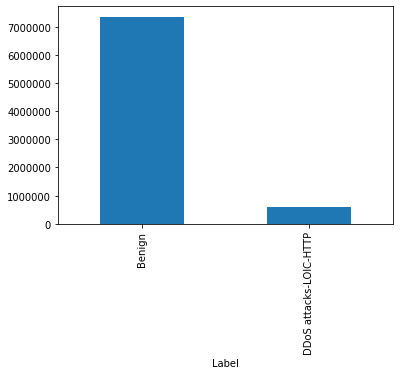

,Label,count
0,Benign,7372557
1,DDoS attacks-LOIC-HTTP,576191


0    0.927512
1    0.072488
dtype: float64

DataFrame only missing values, shape (4209795, 20)


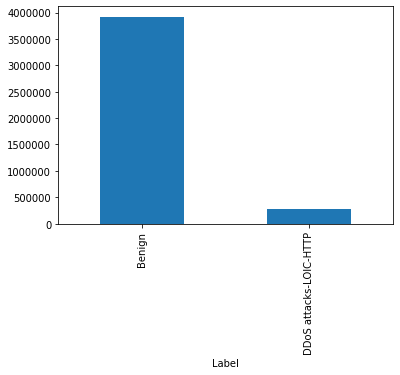

,Label,count
0,Benign,3922893
1,DDoS attacks-LOIC-HTTP,286902


0    0.931849
1    0.068151
dtype: float64

DataFrame only missing values, shape (4209795, 20)


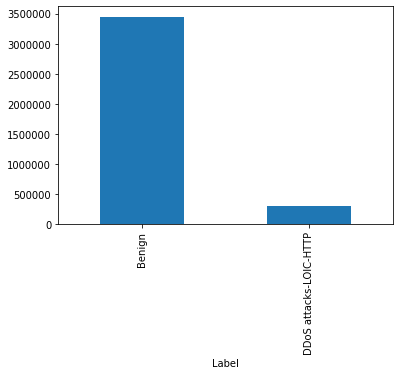

,Label,count
0,Benign,3448885
1,DDoS attacks-LOIC-HTTP,289289


0    0.922612
1    0.077388
dtype: float64

DataFrame after missing values removal, shape (3738174, 20)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,3738174.0,2.037625e+07,3.929724e+07,1.0,188677.25,1889399.0,6032630.25,120000000.0
TotLen Fwd Pkts,3738174.0,7.125010e+02,3.201393e+03,0.0,31.00,455.0,1144.00,1994167.0
TotLen Bwd Pkts,3738174.0,1.055116e+04,3.326022e+05,0.0,170.00,971.0,1640.00,37583377.0
Fwd Pkt Len Std,3738174.0,1.129930e+02,9.793173e+01,0.0,18.00,89.0,205.00,1032.0
Bwd Pkt Len Max,3738174.0,7.643928e+02,5.661835e+02,0.0,131.00,964.0,1173.00,65160.0
Bwd Pkt Len Std,3738174.0,3.024720e+02,2.288516e+02,0.0,62.00,399.0,482.00,22448.0
Flow Byts/s,3738174.0,1.152700e+05,2.405756e+06,0.0,48.00,697.0,1385.00,916078431.0
Flow Pkts/s,3738174.0,1.229488e+04,7.809153e+04,0.0,2.00,7.0,32.00,3000000.0
Flow IAT Max,3738174.0,7.400292e+06,1.632750e+07,1.0,119349.25,953204.0,5489965.50,119951852.0
Bwd IAT Min,3738174.0,7.603819e+05,6.156043e+06,0.0,0.00,29.0,104416.00,119956094.0


################################################################################
New datafile: cse-cic-ids2018/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
################################################################################


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,6,7,11,12,15,16,17,20,31,37,41,43,47,48,52,67,68,70) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DataFrame before cleaning


,count,unique,top,freq
Flow Duration,331125,159256,2,7258
TotLen Fwd Pkts,331125,5599,0,76892
TotLen Bwd Pkts,331125,10875,0,96519
Fwd Pkt Len Std,331125,15816,0,172890
Bwd Pkt Len Max,331125,1270,0,96519
Bwd Pkt Len Std,331125,16435,0,193188
Flow Byts/s,329291,177796,0,75299
Flow Pkts/s,331125,161005,1000000,7243
Flow IAT Max,331125,90505,10000000,8235
Bwd IAT Min,331125,54558,0,179613


DataFrame before missing values removal, shape (331125, 20)


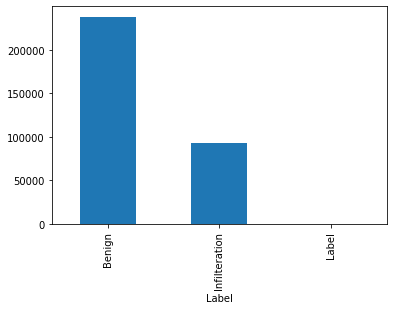

,Label,count
0,Benign,238037
1,Infilteration,93063
2,Label,25


0    0.718874
1    0.281051
2    0.000076
dtype: float64

DataFrame only missing values, shape (135260, 20)


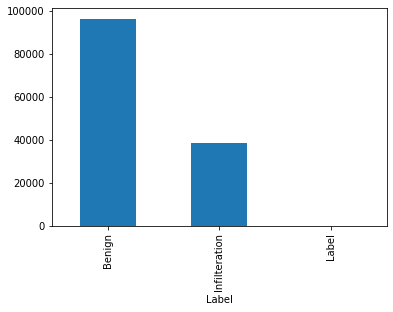

,Label,count
0,Benign,96455
1,Infilteration,38780
2,Label,25


0    0.713108
1    0.286707
2    0.000185
dtype: float64

DataFrame only missing values, shape (135260, 20)


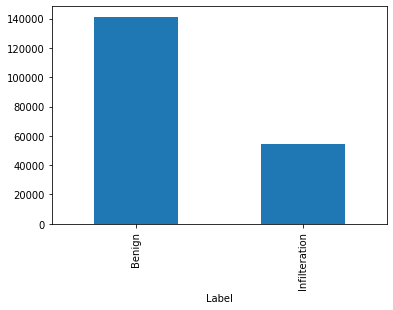

,Label,count
0,Benign,141323
1,Infilteration,54270


0    0.722536
1    0.277464
dtype: float64

DataFrame after missing values removal, shape (195593, 20)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,195593.0,1.952323e+07,3.972200e+07,1.0,247.0,471583.0,5185122.0,119999992.0
TotLen Fwd Pkts,195593.0,5.761479e+02,1.681583e+03,0.0,0.0,77.0,1128.0,162048.0
TotLen Bwd Pkts,195593.0,5.255782e+03,2.692398e+05,0.0,0.0,114.0,1581.0,38600000.0
Fwd Pkt Len Std,195593.0,8.278673e+01,1.039847e+02,0.0,0.0,23.0,189.0,1324.0
Bwd Pkt Len Max,195593.0,4.941902e+02,6.165464e+02,0.0,0.0,99.0,1173.0,65160.0
Bwd Pkt Len Std,195593.0,1.848687e+02,2.434496e+02,0.0,0.0,0.0,430.0,21326.0
Flow Byts/s,195593.0,1.568556e+05,3.193866e+06,0.0,0.0,76.0,1605.0,708000000.0
Flow Pkts/s,195593.0,1.108300e+05,3.282708e+05,0.0,3.0,15.0,8230.0,3000000.0
Flow IAT Max,195593.0,6.972767e+06,1.640932e+07,1.0,246.0,236940.0,4209573.0,120000000.0
Bwd IAT Min,195593.0,4.090112e+05,3.892291e+06,0.0,0.0,0.0,63284.0,120000000.0


################################################################################
New datafile: cse-cic-ids2018/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
################################################################################
DataFrame before cleaning


,count,mean,std,min,25%,50%,75%,max
Flow Duration,1048575.0,1.430739e+07,3.335503e+07,0.000000,413.000000,36896.000000,3.377079e+06,1.200000e+08
TotLen Fwd Pkts,1048575.0,4.354262e+02,2.881334e+04,0.000000,0.000000,44.000000,3.330000e+02,8.737314e+06
TotLen Bwd Pkts,1048575.0,4.925884e+03,1.399474e+05,0.000000,0.000000,99.000000,4.880000e+02,2.790523e+07
Fwd Pkt Len Std,1048575.0,5.079972e+01,9.133395e+01,0.000000,0.000000,0.000000,8.192355e+01,1.840158e+04
Bwd Pkt Len Max,1048575.0,3.305074e+02,4.938690e+02,0.000000,0.000000,90.000000,4.090000e+02,2.708000e+03
Bwd Pkt Len Std,1048575.0,1.204887e+02,2.068673e+02,0.000000,0.000000,0.000000,1.670353e+02,1.329361e+03
Flow Byts/s,1043654.0,inf,NaN,0.000000,0.000000,1031.362899,9.054805e+04,inf
Flow Pkts/s,1048575.0,inf,NaN,0.016668,2.389973,97.406551,6.410256e+03,inf
Flow IAT Max,1048575.0,6.777187e+06,1.730306e+07,0.000000,328.000000,30423.000000,1.929832e+06,1.199915e+08
Bwd IAT Min,1048575.0,6.486163e+05,6.418770e+06,0.000000,0.000000,0.000000,2.200000e+01,1.199131e+08


DataFrame before missing values removal, shape (1048575, 20)


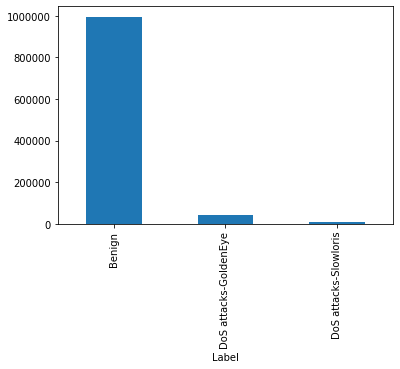

,Label,count
0,Benign,996077
1,DoS attacks-GoldenEye,41508
2,DoS attacks-Slowloris,10990


0    0.949934
1    0.039585
2    0.010481
dtype: float64

DataFrame only missing values, shape (587584, 20)


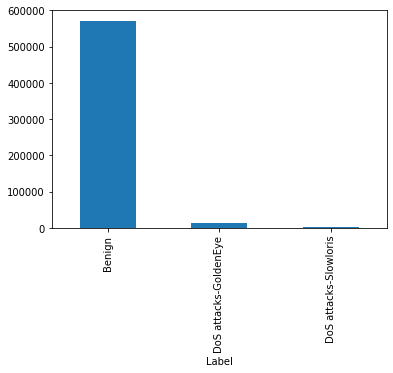

,Label,count
0,Benign,571490
1,DoS attacks-GoldenEye,13736
2,DoS attacks-Slowloris,2358


0    0.972610
1    0.023377
2    0.004013
dtype: float64

DataFrame only missing values, shape (587584, 20)


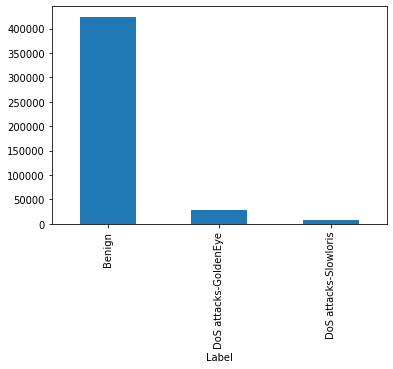

,Label,count
0,Benign,424481
1,DoS attacks-GoldenEye,27772
2,DoS attacks-Slowloris,8632


0    0.921013
1    0.060258
2    0.018729
dtype: float64

DataFrame after missing values removal, shape (460885, 20)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,460885.0,2.499822e+07,4.218554e+07,1.0,40830.0,2423995.0,17375914.0,120000000.0
TotLen Fwd Pkts,460885.0,9.466549e+02,4.345537e+04,0.0,97.0,399.0,1128.0,8737314.0
TotLen Bwd Pkts,460885.0,1.111773e+04,2.109283e+05,0.0,5.0,582.0,1874.0,27905234.0
Fwd Pkt Len Std,460885.0,1.132783e+02,1.089263e+02,0.0,33.0,93.0,203.0,18402.0
Bwd Pkt Len Max,460885.0,6.761865e+02,5.802138e+02,0.0,1.0,488.0,1173.0,2708.0
Bwd Pkt Len Std,460885.0,2.740073e+02,2.351499e+02,0.0,0.0,244.0,453.0,1329.0
Flow Byts/s,460885.0,1.918075e+05,3.195989e+06,0.0,23.0,246.0,1452.0,765901639.0
Flow Pkts/s,460885.0,1.447177e+04,1.075571e+05,0.0,1.0,7.0,181.0,3000000.0
Flow IAT Max,460885.0,9.670853e+06,1.959876e+07,1.0,22633.0,953164.0,9974973.0,119464308.0
Bwd IAT Min,460885.0,1.332547e+06,9.213111e+06,0.0,0.0,13.0,38676.0,119464319.0


################################################################################
New datafile: cse-cic-ids2018/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
################################################################################
DataFrame before cleaning


,count,mean,std,min,25%,50%,75%,max
Flow Duration,1048575.0,1.493482e+07,1.475475e+09,-8.282200e+11,509.000000,81591.000000,5.235859e+06,1.200000e+08
TotLen Fwd Pkts,1048575.0,3.988747e+02,4.970648e+03,0.000000e+00,0.000000,45.000000,4.550000e+02,3.982514e+06
TotLen Bwd Pkts,1048575.0,7.344806e+03,2.958085e+05,0.000000e+00,0.000000,103.000000,5.820000e+02,5.606950e+07
Fwd Pkt Len Std,1048575.0,5.461675e+01,8.664403e+01,0.000000e+00,0.000000,0.000000,8.544784e+01,1.032376e+03
Bwd Pkt Len Max,1048575.0,3.602371e+02,5.126904e+02,0.000000e+00,0.000000,97.000000,4.880000e+02,4.012000e+03
Bwd Pkt Len Std,1048575.0,1.273369e+02,2.043697e+02,0.000000e+00,0.000000,0.000000,2.440000e+02,2.006000e+03
Flow Byts/s,1045006.0,inf,NaN,0.000000e+00,0.000000,788.591026,6.530160e+04,inf
Flow Pkts/s,1048575.0,inf,NaN,-8.895325e-03,2.396306,54.158468,5.917160e+03,inf
Flow IAT Max,1048575.0,1.590614e+07,2.094857e+09,-8.282200e+11,353.000000,56504.000000,4.866976e+06,9.684340e+11
Bwd IAT Min,1048575.0,1.250830e+05,2.047006e+06,0.000000e+00,0.000000,0.000000,1.860000e+02,1.199918e+08


DataFrame before missing values removal, shape (1048575, 20)


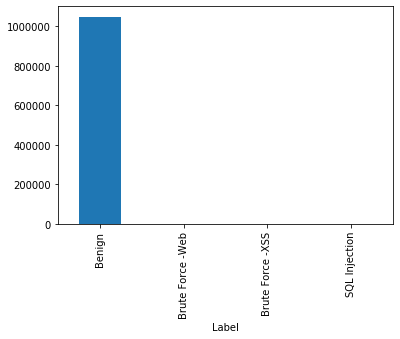

,Label,count
0,Benign,1048213
1,Brute Force -Web,249
2,Brute Force -XSS,79
3,SQL Injection,34


0    0.999655
1    0.000237
2    0.000075
3    0.000032
dtype: float64

DataFrame only missing values, shape (577969, 20)


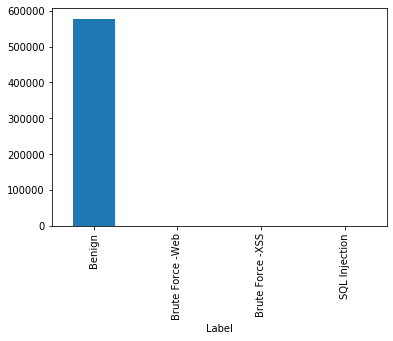

,Label,count
0,Benign,577815
1,Brute Force -Web,104
2,Brute Force -XSS,39
3,SQL Injection,11


0    0.999734
1    0.000180
2    0.000067
3    0.000019
dtype: float64

DataFrame only missing values, shape (577969, 20)


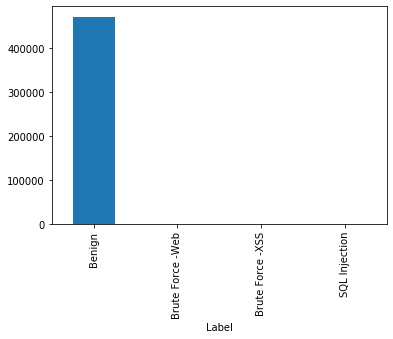

,Label,count
0,Benign,470296
1,Brute Force -Web,145
2,Brute Force -XSS,40
3,SQL Injection,23


0    0.999558
1    0.000308
2    0.000085
3    0.000049
dtype: float64

DataFrame after missing values removal, shape (470504, 20)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,470504.0,2.025615e+07,3.884741e+07,1.0,125639.75,2529682.5,5943015.5,119999993.0
TotLen Fwd Pkts,470504.0,8.426822e+02,7.394383e+03,0.0,97.00,599.0,1148.0,3982514.0
TotLen Bwd Pkts,470504.0,1.628843e+04,4.414356e+05,0.0,231.00,1441.0,1731.0,56069495.0
Fwd Pkt Len Std,470504.0,1.199728e+02,9.427270e+01,0.0,48.00,93.0,197.0,1032.0
Bwd Pkt Len Max,470504.0,7.366786e+02,5.690232e+02,0.0,197.00,858.0,1179.0,4012.0
Bwd Pkt Len Std,470504.0,2.836522e+02,2.207175e+02,0.0,75.00,286.0,430.0,2006.0
Flow Byts/s,470504.0,1.507652e+05,2.420858e+06,0.0,54.00,708.0,1327.0,105086806.0
Flow Pkts/s,470504.0,1.157076e+04,8.679227e+04,0.0,1.00,6.0,66.0,3000000.0
Flow IAT Max,470504.0,6.693106e+06,1.550287e+07,1.0,70795.00,953143.0,5673545.5,119346994.0
Bwd IAT Min,470504.0,2.069558e+05,2.231983e+06,0.0,0.00,170.0,107356.0,112183502.0


################################################################################
New datafile: cse-cic-ids2018/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
################################################################################
DataFrame before cleaning


,count,mean,std,min,25%,50%,75%,max
Flow Duration,1048575.0,6.255555e+06,1.260291e+09,-9.190110e+11,7.000000,1023.000000,406669.000000,1.200000e+08
TotLen Fwd Pkts,1048575.0,4.479936e+02,1.573541e+04,0.000000e+00,0.000000,36.000000,455.000000,8.591554e+06
TotLen Bwd Pkts,1048575.0,4.521803e+03,1.515021e+05,0.000000e+00,0.000000,55.000000,768.000000,1.339773e+07
Fwd Pkt Len Std,1048575.0,5.021107e+01,8.518887e+01,0.000000e+00,0.000000,0.000000,92.953393,1.576084e+04
Bwd Pkt Len Max,1048575.0,3.325241e+02,4.938587e+02,0.000000e+00,0.000000,53.000000,571.000000,1.460000e+03
Bwd Pkt Len Std,1048575.0,1.113899e+02,1.860082e+02,0.000000e+00,0.000000,0.000000,244.000000,9.446947e+02
Flow Byts/s,1046298.0,inf,NaN,0.000000e+00,0.000000,88.155615,12254.605015,inf
Flow Pkts/s,1048575.0,inf,NaN,-1.029761e-03,16.713563,2100.840336,285714.285714,inf
Flow IAT Max,1048575.0,6.306042e+06,1.530125e+09,-1.594380e+11,7.000000,985.000000,202757.500000,9.797810e+11
Bwd IAT Min,1048575.0,8.880474e+04,1.690612e+06,0.000000e+00,0.000000,0.000000,10.000000,1.194003e+08


DataFrame before missing values removal, shape (1048575, 20)


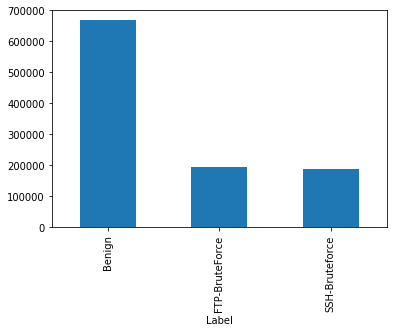

,Label,count
0,Benign,667626
1,FTP-BruteForce,193360
2,SSH-Bruteforce,187589


0    0.636698
1    0.184403
2    0.178899
dtype: float64

DataFrame only missing values, shape (347376, 20)


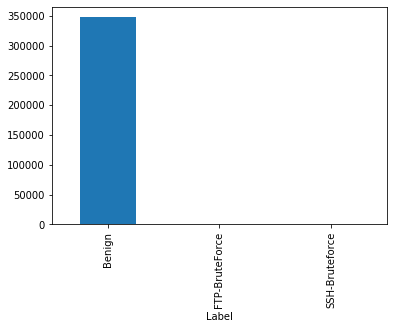

,Label,count
0,Benign,347365
1,FTP-BruteForce,6
2,SSH-Bruteforce,5


0    0.999968
1    0.000017
2    0.000014
dtype: float64

DataFrame only missing values, shape (347376, 20)


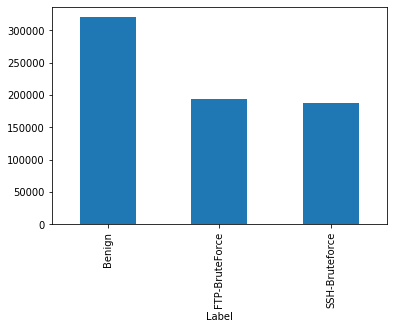

,Label,count
0,Benign,320205
1,FTP-BruteForce,193354
2,SSH-Bruteforce,187584


0    0.45669
1    0.27577
2    0.26754
dtype: float64

DataFrame after missing values removal, shape (701143, 20)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,701143.0,9.507238e+06,2.840230e+07,1.0,5.0,978.0,1659714.0,119999989.0
TotLen Fwd Pkts,701143.0,6.524036e+02,1.923979e+04,0.0,0.0,31.0,1138.0,8591554.0
TotLen Bwd Pkts,701143.0,6.726130e+03,1.852347e+05,0.0,0.0,0.0,1640.0,13397730.0
Fwd Pkt Len Std,701143.0,7.435191e+01,9.529381e+01,0.0,0.0,18.0,138.0,15761.0
Bwd Pkt Len Max,701143.0,4.672152e+02,5.549579e+02,0.0,0.0,0.0,976.0,1460.0
Bwd Pkt Len Std,701143.0,1.665732e+02,2.063150e+02,0.0,0.0,0.0,269.0,945.0
Flow Byts/s,701143.0,7.127842e+04,1.731924e+06,0.0,0.0,11.0,1686.0,422631579.0
Flow Pkts/s,701143.0,3.756990e+05,6.150084e+05,0.0,9.0,6856.0,400000.0,3000000.0
Flow IAT Max,701143.0,3.293916e+06,1.157717e+07,1.0,5.0,358.0,953096.0,119625816.0
Bwd IAT Min,701143.0,9.829138e+04,1.560667e+06,0.0,0.0,0.0,22.0,96436273.0


################################################################################
New datafile: cse-cic-ids2018/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv
################################################################################
DataFrame before cleaning


,count,mean,std,min,25%,50%,75%,max
Flow Duration,1048575.0,399040.098942,6.630337e+06,2.000000,1408.000000,4720.000000,14649.000000,1.200000e+08
TotLen Fwd Pkts,1048575.0,6563.580836,1.567596e+05,0.000000,0.000000,247.000000,935.000000,9.908128e+06
TotLen Bwd Pkts,1048575.0,248.652730,3.257857e+02,0.000000,0.000000,0.000000,316.000000,9.121000e+03
Fwd Pkt Len Std,1048575.0,169.951857,1.887000e+02,0.000000,0.000000,0.000000,418.144712,6.901362e+02
Bwd Pkt Len Max,1048575.0,248.587856,3.252947e+02,0.000000,0.000000,0.000000,316.000000,1.104000e+03
Bwd Pkt Len Std,1048575.0,145.514154,1.687515e+02,0.000000,0.000000,0.000000,223.445743,4.993862e+02
Flow Byts/s,1048575.0,259916.047508,3.984863e+05,0.000000,0.000000,33.527132,405294.341500,2.077430e+06
Flow Pkts/s,1048575.0,1877.982163,4.528752e+03,0.022352,302.010527,758.725341,3129.890454,1.000000e+06
Flow IAT Max,1048575.0,66693.532984,1.422355e+06,2.000000,970.000000,4514.000000,13861.000000,1.060000e+08
Bwd IAT Min,1048575.0,2105.284774,2.019699e+04,0.000000,0.000000,0.000000,670.000000,1.910000e+07


DataFrame before missing values removal, shape (1048575, 20)


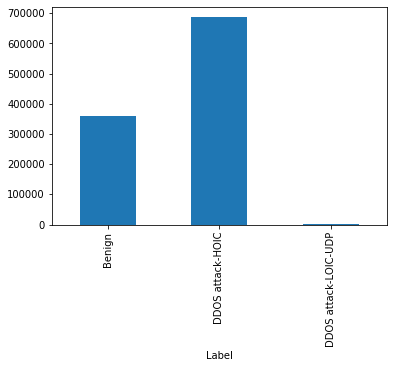

,Label,count
0,Benign,360833
1,DDOS attack-HOIC,686012
2,DDOS attack-LOIC-UDP,1730


0    0.344117
1    0.654233
2    0.001650
dtype: float64

DataFrame only missing values, shape (525993, 20)


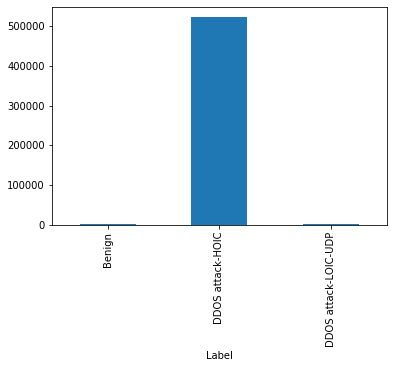

,Label,count
0,Benign,2001
1,DDOS attack-HOIC,522262
2,DDOS attack-LOIC-UDP,1730


0    0.003804
1    0.992907
2    0.003289
dtype: float64

DataFrame only missing values, shape (525993, 20)


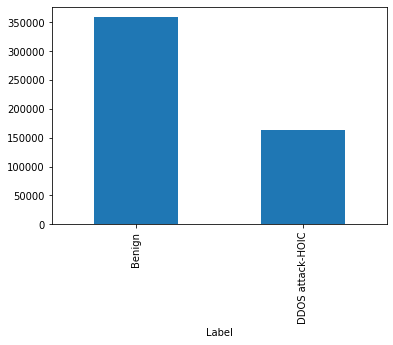

,Label,count
0,Benign,358832
1,DDOS attack-HOIC,163750


0    0.686652
1    0.313348
dtype: float64

DataFrame after missing values removal, shape (522582, 20)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,522582.0,11054.232635,456491.206679,3.0,1290.00,2981.0,14449.00,117901523.0
TotLen Fwd Pkts,522582.0,735.375734,296.747550,0.0,324.00,935.0,935.00,13488.0
TotLen Bwd Pkts,522582.0,498.924230,296.814248,0.0,291.00,316.0,935.00,9121.0
Fwd Pkt Len Std,522582.0,340.915498,114.441087,0.0,187.00,418.0,418.00,482.0
Bwd Pkt Len Max,522582.0,498.794059,295.841675,0.0,291.00,316.0,935.00,1104.0
Bwd Pkt Len Std,522582.0,292.120858,120.134635,0.0,206.00,223.0,468.00,499.0
Flow Byts/s,522582.0,521405.854750,426959.503081,0.0,85480.25,413612.0,956078.00,2077430.0
Flow Pkts/s,522582.0,2977.075552,3077.324703,0.0,484.00,2348.0,5426.00,666667.0
Flow IAT Max,522582.0,8895.799695,318399.604041,3.0,704.00,2303.0,12987.75,106000000.0
Bwd IAT Min,522582.0,4224.311174,28452.573604,0.0,28.00,671.0,2036.00,19100000.0


################################################################################
New datafile: cse-cic-ids2018/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv
################################################################################


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,6,7,11,12,15,16,17,20,31,37,41,43,47,48,52,67,68,70) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DataFrame before cleaning


,count,unique,top,freq
Flow Duration,613104,180723,2,19652
TotLen Fwd Pkts,613104,7156,0,88273
TotLen Bwd Pkts,613104,14002,0,118872
Fwd Pkt Len Std,613104,36165,0,244362
Bwd Pkt Len Max,613104,1457,0,118872
Bwd Pkt Len Std,613104,36197,0,275551
Flow Byts/s,609063,346891,0,85447
Flow Pkts/s,613104,290490,1000000,19667
Flow IAT Max,613104,154508,2,19654
Bwd IAT Min,613104,51037,0,256367


DataFrame before missing values removal, shape (613104, 20)


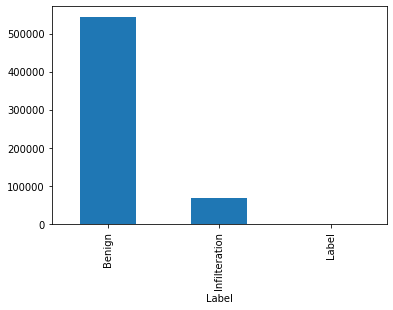

,Label,count
0,Benign,544200
1,Infilteration,68871
2,Label,33


0    0.887614
1    0.112332
2    0.000054
dtype: float64

DataFrame only missing values, shape (216150, 20)


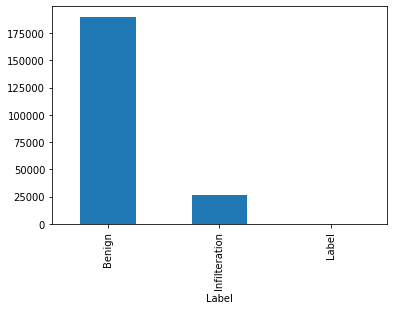

,Label,count
0,Benign,190100
1,Infilteration,26017
2,Label,33


0    0.879482
1    0.120365
2    0.000153
dtype: float64

DataFrame only missing values, shape (216150, 20)


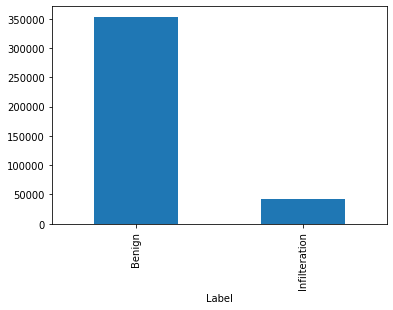

,Label,count
0,Benign,353364
1,Infilteration,42743


0    0.892092
1    0.107908
dtype: float64

DataFrame after missing values removal, shape (396107, 20)


,count,mean,std,min,25%,50%,75%,max
Flow Duration,396107.0,1.793684e+07,3.808248e+07,1.0,248.0,94503.0,5414140.0,119999957.0
TotLen Fwd Pkts,396107.0,6.301886e+02,2.578076e+04,0.0,0.0,51.0,864.0,13486697.0
TotLen Bwd Pkts,396107.0,5.165306e+03,2.411006e+05,0.0,0.0,96.0,1581.0,34937934.0
Fwd Pkt Len Std,396107.0,7.734364e+01,1.068432e+02,0.0,0.0,18.0,150.0,3311.0
Bwd Pkt Len Max,396107.0,4.831506e+02,6.169867e+02,0.0,0.0,84.0,1173.0,31469.0
Bwd Pkt Len Std,396107.0,1.832011e+02,2.528880e+02,0.0,0.0,0.0,430.0,1329.0
Flow Byts/s,396107.0,1.994750e+05,2.958574e+06,0.0,0.0,212.0,6510.0,247000000.0
Flow Pkts/s,396107.0,9.527323e+04,3.205069e+05,0.0,3.0,67.0,8547.0,3000000.0
Flow IAT Max,396107.0,6.503370e+06,1.532978e+07,1.0,241.0,56362.0,4953750.0,119455389.0
Bwd IAT Min,396107.0,3.785503e+05,3.918350e+06,0.0,0.0,0.0,26.0,118163443.0


In [24]:
for dataset_file in sorted(glob(f'{dataset_name}/*.csv')):
  file_name = dataset_file.split('/')[-1]
  print('#' * 80)
  print('New datafile:', dataset_file)
  print('#' * 80)
  df = pd.read_csv(dataset_file, usecols=selected_features_common + ['Label'])
  df = clean.get_clean_df(df, verbose=1)  
  df.to_csv(f'{dataset_name_clean}/{file_name}', index=False)

In [25]:
!ls -al $dataset_name_clean

total 640536
drwxrwxr-x  2 ec2-user ec2-user      4096 Jan  3 19:13 .
drwxr-xr-x 10 ec2-user ec2-user      4096 Jan  3 19:14 ..
-rw-rw-r--  1 ec2-user ec2-user  43375773 Jan  3 19:11 Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r--  1 ec2-user ec2-user  49622256 Jan  3 19:11 Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r--  1 ec2-user ec2-user  38558811 Jan  3 19:11 Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r--  1 ec2-user ec2-user 306445922 Jan  3 19:12 Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r--  1 ec2-user ec2-user  14774621 Jan  3 19:12 Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r--  1 ec2-user ec2-user  37085528 Jan  3 19:12 Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r--  1 ec2-user ec2-user  38162420 Jan  3 19:13 Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r--  1 ec2-user ec2-user  53203304 Jan  3 19:13 Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r--  1 ec2-user ec2-user  4562

In [26]:
!ls -alh $dataset_name_clean

total 626M
drwxrwxr-x  2 ec2-user ec2-user 4.0K Jan  3 19:13 .
drwxr-xr-x 10 ec2-user ec2-user 4.0K Jan  3 19:14 ..
-rw-rw-r--  1 ec2-user ec2-user  42M Jan  3 19:11 Friday-02-03-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r--  1 ec2-user ec2-user  48M Jan  3 19:11 Friday-16-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r--  1 ec2-user ec2-user  37M Jan  3 19:11 Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r--  1 ec2-user ec2-user 293M Jan  3 19:12 Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r--  1 ec2-user ec2-user  15M Jan  3 19:12 Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r--  1 ec2-user ec2-user  36M Jan  3 19:12 Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r--  1 ec2-user ec2-user  37M Jan  3 19:13 Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r--  1 ec2-user ec2-user  51M Jan  3 19:13 Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv
-rw-rw-r--  1 ec2-user ec2-user  44M Jan  3 19:13 Wednesday-21-02-2018_TrafficForML_CICFl

In [27]:
!head -2 $dataset_name_clean/*.csv

==> cse-cic-ids2018-clean/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv <==
Flow Duration,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Max,Bwd IAT Min,Bwd Header Len,Pkt Len Max,Pkt Len Std,RST Flag Cnt,PSH Flag Cnt,ECE Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
141385,553,3773,88,1460,655,30597,113,73403,1,152,1460,475,1,1,1,8192,119,20,Benign

==> cse-cic-ids2018-clean/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv <==
Flow Duration,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Max,Bwd IAT Min,Bwd Header Len,Pkt Len Max,Pkt Len Std,RST Flag Cnt,PSH Flag Cnt,ECE Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
20784143,2416,1344,55,64,32,181,3,9058214,41601,880,240,54,0,0,0,263,255,20,Benign

==> cse-cic-ids2018-clean/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv <==
Flow Duration,TotLen Fwd Pkts,TotLen 

Load all data files into a common dataframe

In [28]:
df = pd.concat(map(pd.read_csv, glob(f'{dataset_name_clean}/*.csv')))

In [29]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head().transpose())
    display(df.describe().transpose())

,0,1,2,3,4
Flow Duration,20784143,20,24,22,260500
TotLen Fwd Pkts,2416,0,0,0,217
TotLen Bwd Pkts,1344,0,0,0,24171
Fwd Pkt Len Std,55,0,0,0,54
Bwd Pkt Len Max,64,0,0,0,4344
Bwd Pkt Len Std,32,0,0,0,994
Flow Byts/s,181,0,0,0,93620
Flow Pkts/s,3,100000,83333,90909,123
Flow IAT Max,9058214,20,24,22,88584
Bwd IAT Min,41601,0,0,0,15


,count,mean,std,min,25%,50%,75%,max
Flow Duration,8104760.0,1.648459e+07,3.586444e+07,1.0,5752.00,1520069.5,5118814.00,120000000.0
TotLen Fwd Pkts,8104760.0,7.316584e+02,1.345382e+04,0.0,31.00,455.0,1128.00,13486697.0
TotLen Bwd Pkts,8104760.0,9.388480e+03,3.312801e+05,0.0,96.00,582.0,1581.00,156360426.0
Fwd Pkt Len Std,8104760.0,1.404127e+02,1.319521e+02,0.0,18.00,105.0,218.00,18402.0
Bwd Pkt Len Max,8104760.0,6.501931e+02,5.585224e+02,0.0,76.00,488.0,1173.00,65160.0
Bwd Pkt Len Std,8104760.0,2.634154e+02,2.209558e+02,0.0,0.00,241.0,430.00,22448.0
Flow Byts/s,8104760.0,1.444096e+05,2.308201e+06,0.0,39.00,666.0,1933.00,916078431.0
Flow Pkts/s,8104760.0,6.110577e+04,2.561591e+05,0.0,2.00,9.0,1061.00,3000000.0
Flow IAT Max,8104760.0,6.092391e+06,1.492364e+07,1.0,5065.75,951651.0,4286852.00,120000000.0
Bwd IAT Min,8104760.0,4.975059e+05,4.952165e+06,0.0,0.00,29.0,55230.25,120000000.0


In [30]:
size = df.groupby(['Label']).size().reset_index(name='count')
display(size)

,Label,count
0,Benign,6828209
1,Bot,143014
2,Brute Force -Web,270
3,Brute Force -XSS,113
4,DDOS attack-HOIC,163750
5,DDoS attacks-LOIC-HTTP,289289
6,DoS attacks-GoldenEye,27772
7,DoS attacks-Hulk,25812
8,DoS attacks-SlowHTTPTest,139890
9,DoS attacks-Slowloris,8632


In [31]:
size['fraction'] = (df.groupby(['Label']).size()
                    .reset_index(name='count').apply(lambda x: x['count'] / df.shape[0], axis=1))
display(size)

,Label,count,fraction
0,Benign,6828209,0.842494
1,Bot,143014,0.017646
2,Brute Force -Web,270,0.000033
3,Brute Force -XSS,113,0.000014
4,DDOS attack-HOIC,163750,0.020204
5,DDoS attacks-LOIC-HTTP,289289,0.035694
6,DoS attacks-GoldenEye,27772,0.003427
7,DoS attacks-Hulk,25812,0.003185
8,DoS attacks-SlowHTTPTest,139890,0.017260
9,DoS attacks-Slowloris,8632,0.001065


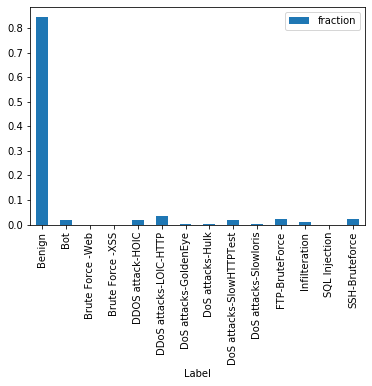

In [32]:
size.plot.bar(x='Label', y='fraction')

Explore correlations between features. In can be noted that there are several groups of highly correlated features (abs(corr)>=0.9), for example:

1. 'TotLen Bwd Pkts', 'Bwd Pkt Len Max', 'Bwd Pkt Len Std', 'Bwd Header Len', and 'Pkt Len Max'
2. 'Pkt Len Std', and 'Pkt Len Max'
3. 'Flow Pkts/s', 'Flow Duration', and 'Flow IAT Max'
4. 'RST Flag Cnt' and 'ECE Flag Cnt'

These correlations, for the non-Benign labels are explored in more details further below, and since the plots show that the correlation coefficient does not represent a linear relationship, all the above features are kept.

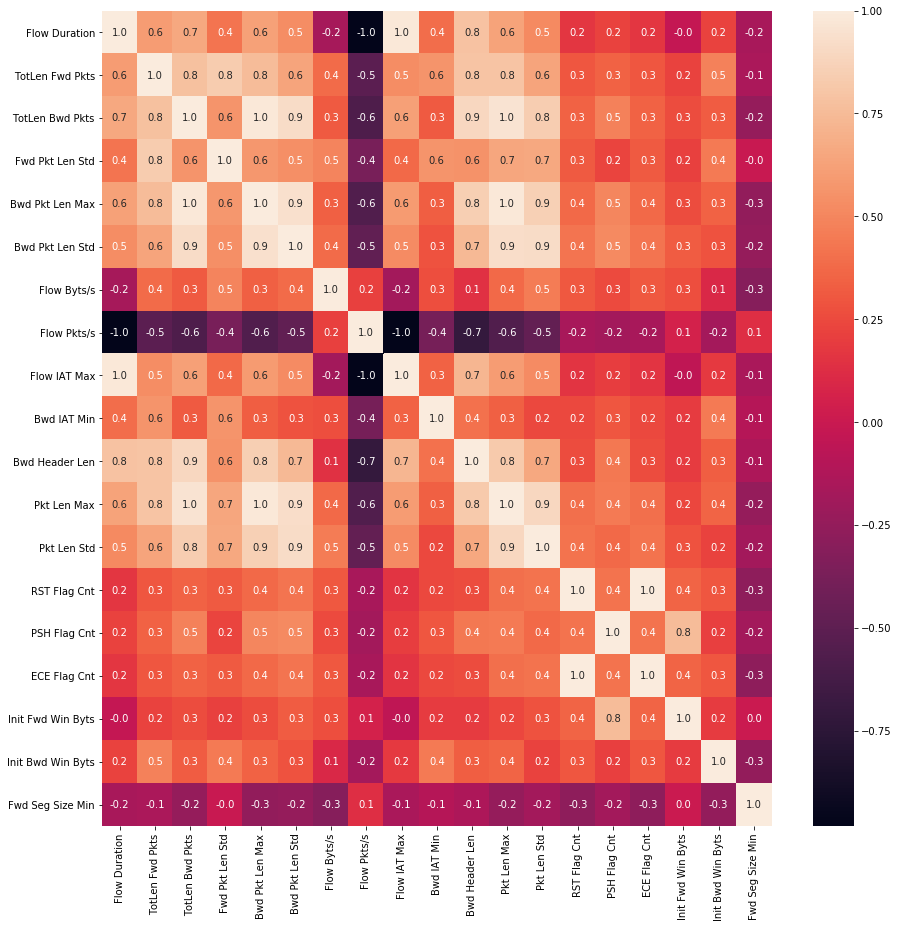

In [33]:
df_corr = df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True, fmt='.1f', ax=ax)

In [34]:
def plot_corr(data, x, y, xlim, ylim):
  import matplotlib.pyplot as plt
  fig, ax = plt.subplots(figsize=(15, 15))
  data.plot.scatter(x=x, y=y, ax=ax)
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

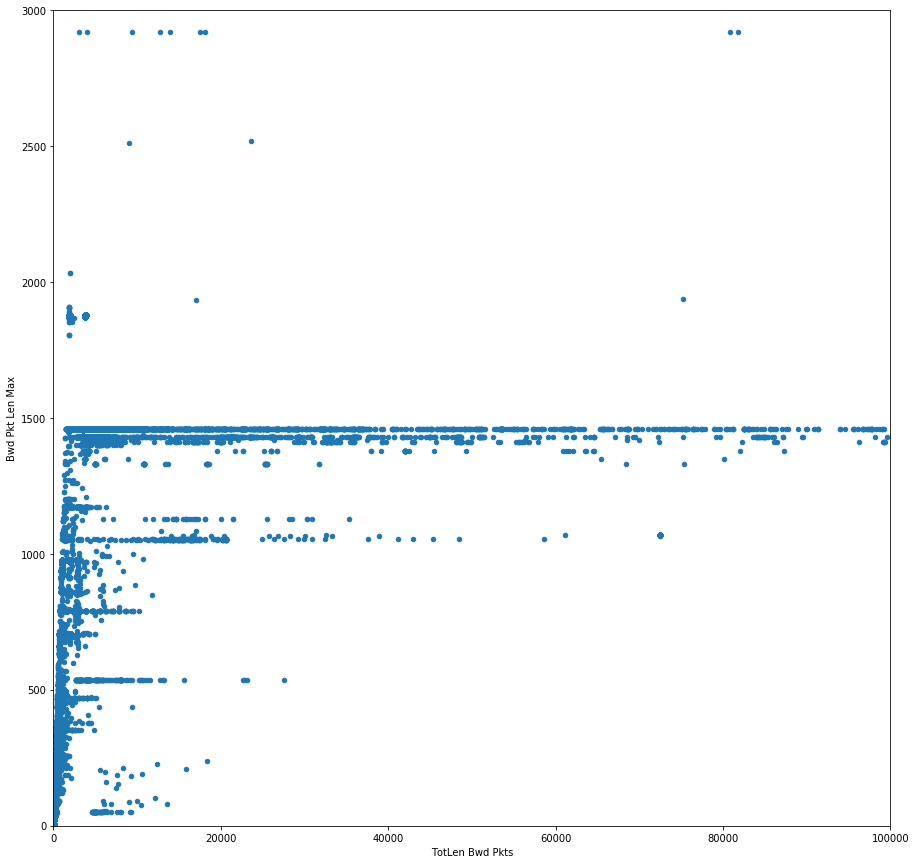

In [35]:
plot_corr(df[df['Label'] != 'Benign'], 'TotLen Bwd Pkts', 'Bwd Pkt Len Max', xlim=(-1, 1e5), ylim=(-1, 3e3))

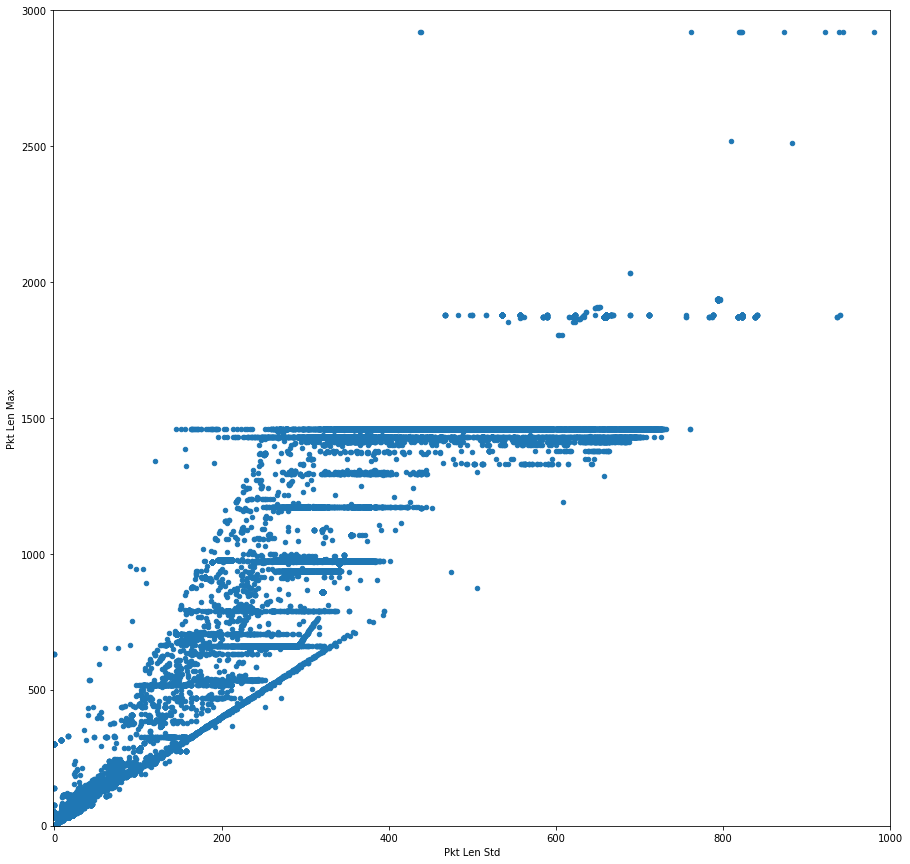

In [36]:
plot_corr(df[df['Label'] != 'Benign'], 'Pkt Len Std', 'Pkt Len Max', xlim=(-1, 1e3), ylim=(-1, 3e3))

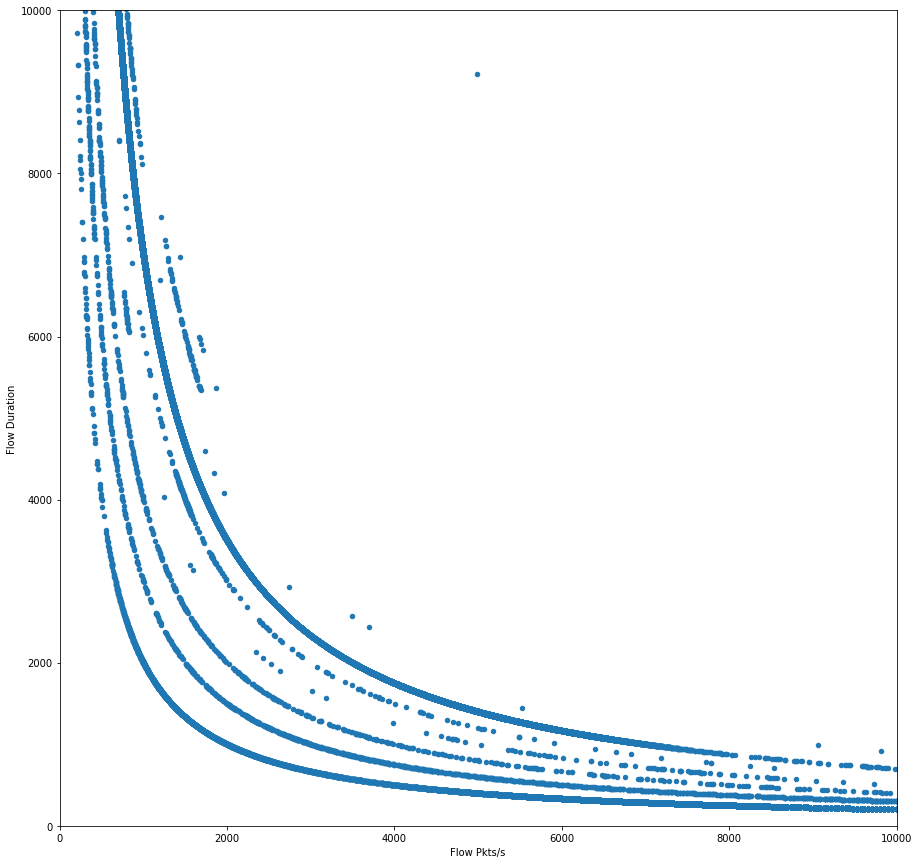

In [37]:
plot_corr(df[df['Label'] != 'Benign'], 'Flow Pkts/s', 'Flow Duration', xlim=(-1, 1e4), ylim=(-1, 1e4))

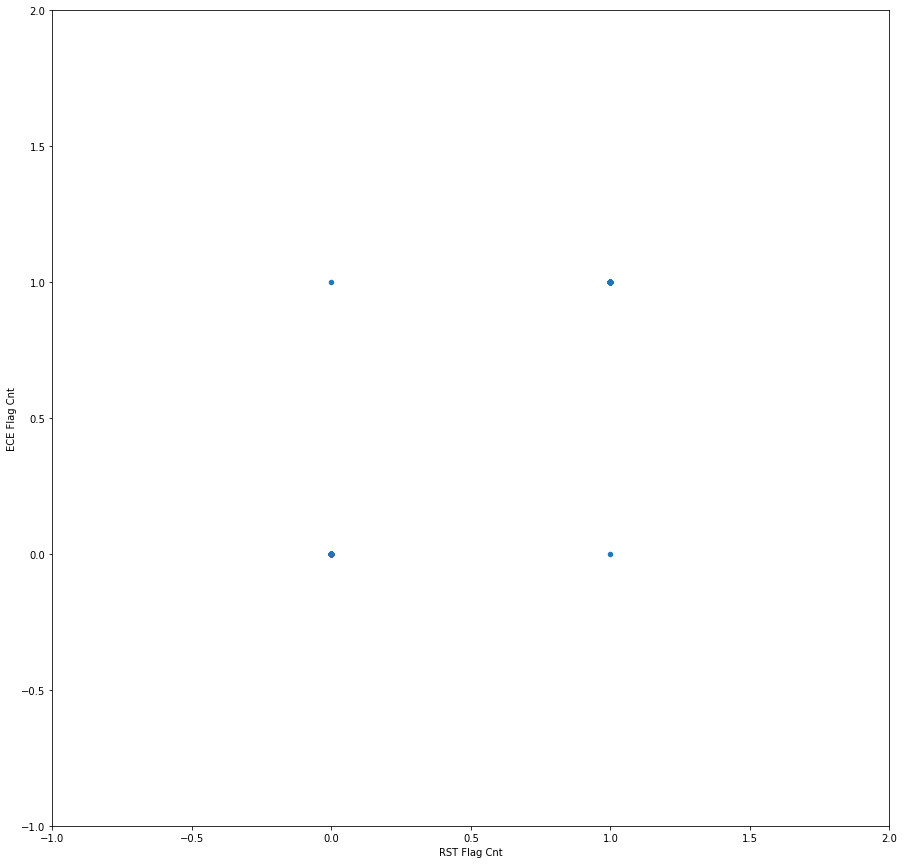

In [38]:
plot_corr(df[df['Label'] != 'Benign'], 'RST Flag Cnt', 'ECE Flag Cnt', xlim=(-1, 2), ylim=(-1, 2))

Save the clean dataset archive

In [39]:
dataset_clean_file = f'{dataset_name_clean}.zip'

In [40]:
!rm -f $dataset_clean_file
!zip -r $dataset_clean_file $dataset_name_clean

  adding: cse-cic-ids2018-clean/ (stored 0%)
  adding: cse-cic-ids2018-clean/Friday-16-02-2018_TrafficForML_CICFlowMeter.csv (deflated 83%)
  adding: cse-cic-ids2018-clean/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv (deflated 85%)
  adding: cse-cic-ids2018-clean/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv (deflated 76%)
  adding: cse-cic-ids2018-clean/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv (deflated 82%)
  adding: cse-cic-ids2018-clean/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv (deflated 76%)
  adding: cse-cic-ids2018-clean/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv (deflated 79%)
  adding: cse-cic-ids2018-clean/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv (deflated 77%)
  adding: cse-cic-ids2018-clean/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv (deflated 79%)
  adding: cse-cic-ids2018-clean/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv (deflated 77%)
  adding: cse-cic-ids2018-clean/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv (de

In [41]:
! /bin/cp -f $dataset_clean_file $dataset_path

In [43]:
!jupyter nbconvert --to html '1-clean.ipynb'

[NbConvertApp] Converting notebook 1-clean.ipynb to html
[NbConvertApp] Writing 2834878 bytes to 1-clean.html
